<center><h1><u>Problem Description</u></h1></center>

<u><h4>Business Problem Overview</h4></u>

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.
For many incumbent operators, retaining high profitable customers is the number one business goal.
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. 

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

This project is based on the Indian and Southeast Asian market.

<u><h4>High Value Churn</h4></u>
In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

In this project, you will define high-value customers based on a certain metric (mentioned later below) and predict churn only on high-value customers.


<u><h4>Understanding Customer Behaviour During Churn</h4></u>
Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :

<u><h4>Good Phase</h4></u>
In this phase, the customer is happy with the service and behaves as usual.

<u><h4>Action Phase</h4></u>
The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

<u><h4>Churn Phase</h4></u>
In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.


<center><u><h1>Business Objective</h1></u></center>

The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

<center><h1><u>Activities list performed while Creating Telecom Churning Model</u></h1></center>

> **Task Performed**
   * Understand problem description
   * Data summary analysis
   * Data cleaning
   * Univariate analysis
   * Variable segmentation

> **Task Pending to be performed**
   * Co-variate analysis
   * WOE analysis
   * VIF analysis
   * RFE analysis
   * PCA analysis
   * Transformation

> **Model Building**
   * Logistic Regression: linear boundary pattern detection
   * Decision Tree: piece wise linear boundary pattern detection
   * Random Forest : to improve overfitting pattern detection of trees 
   * SVMM : radial boundary pattern detection

> **Hyper Parameter Tuning**
   * GridSearch CV

> **Metrics for Model performance**
   * ROC
   * AUC
   * Confusion matrix
   * F1 measure
   * Accuracy
   * Training vs Testing accuracy plot

> **Problems**
   * Outliers
   * Multicollinearity
   * All variables are continuous

### IMPORTS
---

In [2988]:
import pandas as pd
import numpy as np

In [2989]:
pd.options.display.max_rows = 400
pd.options.display.max_columns = 2000

In [2990]:
## to do analysis of the info output of the loan_dataset, this function will create a file with all 
## the required metadata about the loan dataset. This file will consist of missing percent of every
## single column, datatype and null or non-null object of the loan dataset
def create_meta_data_file(no_rows,filename):   

    meta_data = pd.read_csv(filename, sep='\t', skiprows=5)
    meta_data = meta_data.iloc[:(meta_data.shape[0]-2),:]
    
    meta_data['column_name'] = meta_data.iloc[:,:].apply(lambda x:list(filter(lambda x: x !="", x[0].\
                                                                              split(' ')))[1], axis=1)
    
    meta_data['data_type'] = meta_data.iloc[:,:].apply(lambda x:list(filter(lambda x: x !="", x[0]\
                                                                            .split(' ')))[4], axis=1)
    
    meta_data['no_of_rows'] = meta_data.loc[:,:].apply(lambda x:list(filter(lambda x: x !="", x[0]\
                                                                            .split(' ')))[2], axis=1)
    meta_data = meta_data.iloc[:,1:]
    meta_data['missing_percent'] = meta_data['no_of_rows'].astype('float')/no_rows
    meta_data['missing_percent'] = (1-(round(meta_data['no_of_rows'].astype('float')\
                                                   /no_rows,2)))*100
    meta_data.to_csv(filename.split(".")[0]+'.csv', index=False)
    return meta_data

In [2991]:
FILENAME = "telecom_churn_metadata.txt"

#### Reading Data

In [2992]:
raw_data = pd.read_csv("telecom_churn_data.csv")

In [2993]:
raw_data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

<center><h2><u>DATA SUMMARY</u></h2></center>

---

> Looking at a first glance the Macro perspective of the given dataset is mentioned below:<br>
* Incoming
* Outgoing
* Average revenue per user
* Recharge 
* Dates
* 3G and 2G services


All of the above can be seen in a more macro way in terms of Data, Call and Network usage

> All the incoming varibles suffixed with _6, _7 and _8 for the respective good phase months:<br>
* loc_ic_t2t_mou	
* loc_ic_t2m_mou	
* loc_ic_t2f_mou	
* loc_ic_mou	
* std_ic_t2t
* std_ic_t2m_mou
* std_ic_t2f_mou	
* std_ic_mou
* total_ic_mou
    

> All the recharge varibles suffixed with _6, _7 and _8 for the respective good phase months:<br>
   * total_rech_num
   * total_rech_amt
   * max_rech_amt
   * last_day_rch_amt
   * total_rech_data
   * max_rech_data
   * count_rech_2g
   * count_rech_3g
   * av_rech_amt_data
    

> All the network varibles suffixed with _6, _7 and _8 for the respective good phase months:
* onnet_mou
* offnet_mou

> All the outgoing varibles suffixed with _6, _7 and _8 for the respective good phase months:
* loc_og_t2t_mou
* loc_og_t2m_mou
* loc_og_t2f_mou
* loc_og_t2c_mou
* loc_og_mou
* std_og_t2t_mou
* std_og_t2m_mou
* std_og_t2f_mou
* std_og_mou
* isd_og_mou
* spl_og_mou
* og_others
* total_og_mou



<center><h2><u>DATA CLEANING</u></h2></center>

---

In [2994]:
## Creating copy of data to keep raw data untouched
clean_data = raw_data.copy()

In [2995]:
clean_data.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

In [2996]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


> Data format summary
* 179 columns are in float64
* 35 columns are in int64
* 12 columns are in object

In [2997]:
object_cols = clean_data.select_dtypes(include='object').columns

In [2998]:
## Convert all the object columns to datetime, as all the object columns are having date values 
clean_data.loc[:,object_cols ] = clean_data[object_cols].astype('datetime64')

Below are the churn tag attributes used to determine whether customer is churned or not
1. total_ic_mou_9
2. total_og_mou_9
3. vol_2g_mb_9
4. vol_3g_mb_9


In [2999]:
# create is_churned column to find out the customers who switched the telecom service
churn_tag = ((clean_data["total_og_mou_9"]==0.0)&(clean_data["total_og_mou_9"]==0.0)) & \
            ((clean_data["vol_2g_mb_9"]==0.0)&(clean_data["vol_3g_mb_9"]==0.0))

clean_data['is_churned'] = 0
clean_data.loc[churn_tag,'is_churned']= 1

In [3000]:
round((clean_data.is_churned.value_counts()/clean_data.is_churned.value_counts().sum())*100,2)

0    87.97
1    12.03
Name: is_churned, dtype: float64

> **Observation** <br> There are only 12.03 % of customers who are churned which implies a clear case of class imbalance 

In [3001]:
clean_data.shape

(99999, 227)

In [3002]:
## check other factors for total_rech_data_6 and 7 columns having nan values
print(clean_data[clean_data["total_rech_data_7"].isnull()]["count_rech_2g_7"].sum())
print(clean_data[clean_data["total_rech_data_7"].isnull()]["count_rech_3g_7"].sum())
print(clean_data[clean_data["total_rech_data_6"].isnull()]["count_rech_2g_6"].sum())
print(clean_data[clean_data["total_rech_data_6"].isnull()]["count_rech_3g_6"].sum())
print(clean_data[clean_data["total_rech_data_7"].isnull()]["vol_3g_mb_7"].sum())
print(clean_data[clean_data["total_rech_data_7"].isnull()]["vol_2g_mb_7"].sum())
print(clean_data[clean_data["total_rech_data_6"].isnull()]["vol_2g_mb_6"].sum())
print(clean_data[clean_data["total_rech_data_6"].isnull()]["vol_3g_mb_6"].sum())

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


>**Observation**
<br>
* When Total recharge data column is 0 then count and volume columns are also 0
* Seem there is a relationship among recharge data, volume and count columns

In [3003]:
## Average recharge and total recharge have some missing value which can be replaced by 0
## as volume and count column are also 0 implies no recharge and no usage from user
clean_data["av_rech_amt_data_6"].fillna(0, inplace=True)
clean_data["av_rech_amt_data_7"].fillna(0, inplace=True)
clean_data["av_rech_amt_data_8"].fillna(0, inplace=True)
clean_data["total_rech_data_6"].fillna(0, inplace=True)
clean_data["total_rech_data_7"].fillna(0, inplace=True)
clean_data["total_rech_data_8"].fillna(0, inplace=True)

clean_data["total_rech_data_6"] = clean_data["total_rech_data_6"]*clean_data["av_rech_amt_data_6"]
clean_data["total_rech_data_7"] = clean_data["total_rech_data_7"]*clean_data["av_rech_amt_data_7"]
clean_data["total_rech_data_8"] = clean_data["total_rech_data_8"]*clean_data["av_rech_amt_data_8"]

clean_data["total_rech_amt_data_6"] = clean_data["total_rech_data_6"]+clean_data["total_rech_amt_6"] 
clean_data["total_rech_amt_data_7"] = clean_data["total_rech_data_7"]+clean_data["total_rech_amt_7"]

**Calculate average recharge amount and filter dataset greater than 70th percentile of the average recharge amount**

In [3004]:
clean_data["avg_rech_amt_gdphase_6_7"] = clean_data[["total_rech_amt_data_6","total_rech_amt_data_7"]].mean(axis=1)

percentile_70th = round(np.percentile(clean_data["avg_rech_amt_gdphase_6_7"], 70),3)

clean_data = clean_data[clean_data["avg_rech_amt_gdphase_6_7"] > percentile_70th]

In [3005]:
percentile_70th

478.0

#### Creating Metadata file to check the datatype and missing percent
---

In [3006]:
%%capture cap --no-stderr
clean_data.info(max_cols=500)

In [3007]:
with open(FILENAME, 'w') as f:
    f.write(cap.stdout)
clean_data.shape
meta_data_df = create_meta_data_file(clean_data.shape[0], FILENAME)

In [3008]:
meta_data_df["missing_percent"]

0       0.0
1       1.0
2       1.0
3       1.0
4       0.0
5       0.0
6       1.0
7       1.0
8       0.0
9       0.0
10      0.0
11      0.0
12      2.0
13      2.0
14      4.0
15      6.0
16      2.0
17      2.0
18      4.0
19      6.0
20      2.0
21      2.0
22      4.0
23      6.0
24      2.0
25      2.0
26      4.0
27      6.0
28      2.0
29      2.0
30      4.0
31      6.0
32      2.0
33      2.0
34      4.0
35      6.0
36      2.0
37      2.0
38      4.0
39      6.0
40      2.0
41      2.0
42      4.0
43      6.0
44      2.0
45      2.0
46      4.0
47      6.0
48      2.0
49      2.0
50      4.0
51      6.0
52      2.0
53      2.0
54      4.0
55      6.0
56      2.0
57      2.0
58      4.0
59      6.0
60      2.0
61      2.0
62      4.0
63      6.0
64      2.0
65      2.0
66      4.0
67      6.0
68      2.0
69      2.0
70      4.0
71      6.0
72      2.0
73      2.0
74      4.0
75      6.0
76      2.0
77      2.0
78      4.0
79      6.0
80      0.0
81      0.0
82      0.0
83  

In [3009]:
missing_val_cols = meta_data_df[meta_data_df["missing_percent"] > 0.0]['column_name'].to_list()[3:]

In [3010]:
## check when std outgoing t2t mou 6 is null which all columns are null to find out the relation
clean_data[clean_data['std_og_t2t_mou_6'].isnull()][['loc_og_mou_6', 'ic_others_6','std_ic_mou_6',\
                                                     'offnet_mou_6','onnet_mou_6','total_rech_num_6','is_churned',\
                                                    'roam_ic_mou_6','std_ic_t2f_mou_6','spl_ic_mou_6', 'loc_ic_t2m_mou_6',\
                                                    'loc_og_t2t_mou_6']].head()

loc_og_mou_6  ic_others_6  std_ic_mou_6  offnet_mou_6  onnet_mou_6  \
0             NaN          NaN           NaN           NaN          NaN   
77            NaN          NaN           NaN           NaN          NaN   
364           NaN          NaN           NaN           NaN          NaN   
414           NaN          NaN           NaN           NaN          NaN   
423           NaN          NaN           NaN           NaN          NaN   

     total_rech_num_6  is_churned  roam_ic_mou_6  std_ic_t2f_mou_6  \
0                   4           1            NaN               NaN   
77                  4           0            NaN               NaN   
364                 4           0            NaN               NaN   
414                 0           0            NaN               NaN   
423                 4           0            NaN               NaN   

     spl_ic_mou_6  loc_ic_t2m_mou_6  loc_og_t2t_mou_6  
0             NaN               NaN               NaN  
77            NaN               NaN               NaN  
364           NaN               NaN               NaN  
414           NaN               NaN               NaN  
423           NaN               NaN               NaN

In [3011]:
import numpy as np

In [3012]:
## impute missing columns value with 0 as there is no recharge done for those specific instances
for col in missing_val_cols:
    clean_data[col] = clean_data[col].replace({np.nan:0})

#### Drop column with only one unique value

In [3013]:
df_unique = pd.DataFrame(clean_data.nunique().sort_values())
df_unique.columns = ["count_of_unique_values"]
unique_1_val_cols = df_unique[df_unique["count_of_unique_values"] == 1].index.to_list()

In [3014]:
unique_1_val_cols

['std_ic_t2o_mou_7',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_9',
 'std_og_t2c_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_9',
 'std_og_t2c_mou_6',
 'circle_id',
 'last_date_of_month_6',
 'loc_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2o_mou',
 'last_date_of_month_7']

In [3015]:
clean_data.drop(unique_1_val_cols, axis=1, inplace=True)

In [3016]:
clean_data.shape

(29953, 216)

In [3017]:
clean_data.describe()

mobile_number        arpu_6        arpu_7        arpu_8        arpu_9  \
count   2.995300e+04  29953.000000  29953.000000  29953.000000  29953.000000   
mean    7.001206e+09    558.820058    561.160547    508.890301    467.446183   
std     6.908102e+05    460.868223    480.028497    502.136278    501.837624   
min     7.000000e+09  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%     7.000609e+09    310.142000    310.071000    231.615000    189.750000   
50%     7.001203e+09    482.354000    481.496000    427.604000    388.093000   
75%     7.001804e+09    700.240000    698.829000    661.753000    626.637000   
max     7.002411e+09  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  29953.000000  29953.000000  29953.000000  29953.000000  29953.000000   
mean     260.900880    268.051744    234.345252    211.705478    373.800402   
std      459.853278    480.303238    458.751242    436.570958    482.712621   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       17.090000     16.040000     10.440000      6.210000     71.610000   
50%       84.640000     82.830000     65.660000     54.410000    222.560000   
75%      290.490000    290.540000    240.630000    209.330000    487.910000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  29953.000000  29953.000000  29953.000000   29953.000000   29953.000000   
mean     378.233106    335.123008    303.307021      16.124001      12.646145   
std      499.138982    481.985106    447.989863      76.344227      75.833558   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       69.980000     46.760000     31.680000       0.000000       0.000000   
50%      220.040000    182.840000    155.790000       0.000000       0.000000   
75%      494.030000    438.860000    397.040000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000    2613.310000    3813.290000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   29953.000000   29953.000000   29953.000000   29953.000000   
mean       12.512269      10.542474      26.596033      20.155134   
std        74.179181      67.009868     116.274169      96.134144   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      4169.810000    3220.660000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   29953.000000   29953.000000      29953.000000      29953.000000   
mean       19.889295      15.806793         84.574122         85.762835   
std       104.799622      88.572782        228.962993        240.702116   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          4.380000          4.630000   
50%         0.000000       0.000000         24.360000         24.680000   
75%         0.000000       0.000000         78.060000         78.510000   
max      5337.040000    4428.460000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
count      29953.000000      29953.000000      29953.000000      29953.000000   
mean          78.153334         73.037748        163.309546        163.087606   
std          227.540167        223.647629        250.218928        241.683234   
min            0.000000          0.000000          0.000000          0.000000   
25%            2.540000          1.440000         19.210000         20.490000   
50%           20.740000         18.090000         77.260000 

In [3018]:
%%capture cap --no-stderr
clean_data.info(max_cols=500)

In [3019]:
with open(FILENAME, 'w') as f:
    f.write(cap.stdout)
clean_data.shape
meta_data_df = create_meta_data_file(clean_data.shape[0], FILENAME)

In [3020]:
cols_without_missing_value = meta_data_df[meta_data_df.missing_percent != 0.0]['column_name'].to_list()

In [3021]:
print(f"no. of columns with missing values--> {len(cols_with_missing_value)}")

no. of columns with missing values--> 168


In [3022]:
clean_data.head()

mobile_number last_date_of_month_8 last_date_of_month_9    arpu_6  \
0      7000842753  2014-08-31 00:00:00  2014-09-30 00:00:00   197.385   
7      7000701601  2014-08-31 00:00:00  2014-09-30 00:00:00  1069.180   
8      7001524846  2014-08-31 00:00:00  2014-09-30 00:00:00   378.721   
21     7002124215  2014-08-31 00:00:00  2014-09-30 00:00:00   514.453   
23     7000887461  2014-08-31 00:00:00  2014-09-30 00:00:00    74.350   

      arpu_7    arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0    214.816   213.803   21.100         0.00         0.00         0.00   
7   1349.850  3171.480  500.000        57.84        54.68        52.29   
8    492.223   137.362  166.787       413.69       351.03        35.08   
21   597.753   637.760  578.596       102.41       132.11        85.14   
23   193.897   366.966  811.480        48.96        50.66        33.58   

    onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  \
0          0.00          0.00          0.00          0.00          0.00   
7          0.00        453.43        567.16        325.91          0.00   
8         33.46         94.66         80.63        136.48        108.71   
21       161.63        757.93        896.68        983.39        869.89   
23        15.74         85.41         89.36        205.89        111.88   

    roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  \
0            0.00           0.00           0.00            0.0           0.00   
7           16.23          33.49          31.64            0.0          23.74   
8            0.00           0.00           0.00            0.0           0.00   
21           0.00           0.00           0.00            0.0           0.00   
23           0.00           0.00           0.00            0.0           0.00   

    roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  \
0            0.00           0.00            0.0              0.00   
7           12.59          38.06            0.0             51.39   
8            0.00           0.00            0.0            297.13   
21           0.00           0.00            0.0              4.48   
23           0.00           0.00            0.0             48.96   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  \
0               0.00              0.00              0.00              0.00   
7              31.38             40.28              0.00            308.63   
8             217.59             12.49             26.13             80.96   
21              6.16             23.34             29.98             91.81   
23             50.66             33.58             15.74             82.94   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  \
0               0.00              0.00              0.00              0.00   
7             447.38            162.28              0.00             62.13   
8              70.58             50.54             34.58              0.00   
21             87.93            104.81            107.54              0.75   
23             83.01            148.56             83.73              0.00   

    loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  \
0               0.00              0.00              0.00               0.0   
7              55.14             53.23              0.00               0.0   
8               0.00              0.00              0.00               0.0   
21              0.00              1.58              0.00               0.0   
23              0.00              0.00              2.45               0.0   

    loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  \
0                0.0              0.00              0.00          0.00   
7                0.0              0.00              0.00        422.16   
8                0.0              7.15              0.00        378.09   
21               0.0              0.00              0.00        

In [3023]:
## Drop the september columns september as only june, july and august data is required 
sept_cols = []

for col in clean_data.columns:
    if "_9" in col:
        sept_cols.append(col)
sept_cols.append("sep_vbc_3g")
sept_data = clean_data[sept_cols].copy()       
clean_data.drop(sept_cols, axis=1, inplace=True)


In [3024]:
sept_data.loc[:, "mobile_number"] = clean_data["mobile_number"]

In [3025]:
sept_data["is_churned"] = clean_data["is_churned"]
sept_data["aon"] = clean_data["aon"]

In [3026]:
## Drop mobile since it has no relevance from the analysis point of view
del clean_data["mobile_number"]

In [3027]:
sept_data.loc[(sept_data["aon"]>=0)    &  (sept_data["aon"] < 500),     "user_tenure"] = "0-1 yrs"
sept_data.loc[(sept_data["aon"]>=500)  &  (sept_data["aon"] < 700),   "user_tenure"] = "1-2 yrs"
sept_data.loc[(sept_data["aon"]>=700)  &  (sept_data["aon"] < 1100),  "user_tenure"] = "2-3 yrs"
sept_data.loc[(sept_data["aon"]>=1100) &  (sept_data["aon"] < 1600), "user_tenure"] = "3-4 yrs"
sept_data.loc[(sept_data["aon"]>=1600) &  (sept_data["aon"] < 2000), "user_tenure"] = "3-4 yrs"

<center><h2><u>EDA</u></h2></center>

---

### Univariate variable analysis

In [3028]:
import seaborn as sns
sns.set(style="darkgrid")
sns.set_context("paper")
FIGSIZE = (10, 6)

---
**Variable: total_rech_amt**

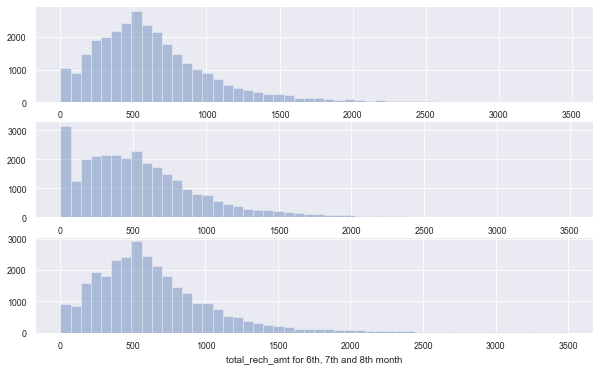

In [3029]:
##Limit data for excluding outliers
fig1, ax1 = plt.subplots(3, figsize= FIGSIZE)
sns.distplot(clean_data.loc[clean_data["total_rech_amt_7"]< 3500,"total_rech_amt_7"], kde=False, ax=ax1[0]);
sns.distplot(clean_data.loc[clean_data["total_rech_amt_8"]< 3500,"total_rech_amt_8"], kde=False, ax=ax1[1]);
sns.distplot(clean_data.loc[clean_data["total_rech_amt_6"] < 3500,"total_rech_amt_6"], kde=False, ax=ax1[2]);
ax1[2].set_xlabel("total_rech_amt for 6th, 7th and 8th month");

#### Observation 
* Total recharge for the month of June, July and August are between 0 to 2500 outside of it are outliers
* It has good range but skewed

**Variable : total_rech_num**

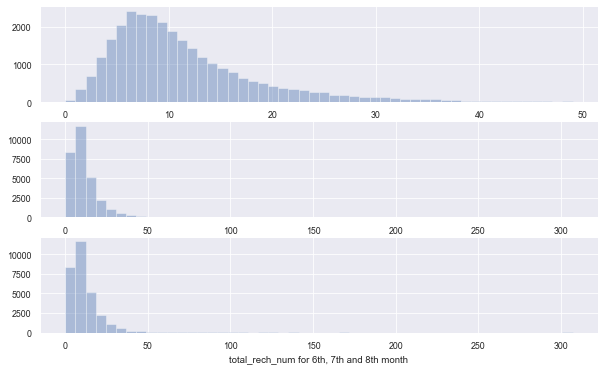

In [3030]:
fig2, ax2 = plt.subplots(3, figsize= FIGSIZE)
sns.distplot(clean_data.loc[clean_data["total_rech_num_6"]<50,"total_rech_num_6"], kde=False, ax=ax2[0]);
sns.distplot(clean_data.loc[clean_data["total_rech_num_7"]<50,"total_rech_num_6"], kde=False, ax=ax2[1]);
sns.distplot(clean_data.loc[clean_data["total_rech_num_8"]<50,"total_rech_num_6"], kde=False, ax=ax2[2]);
ax2[2].set_xlabel("total_rech_num for 6th, 7th and 8th month");

**Variable : total_rech_amt_data**

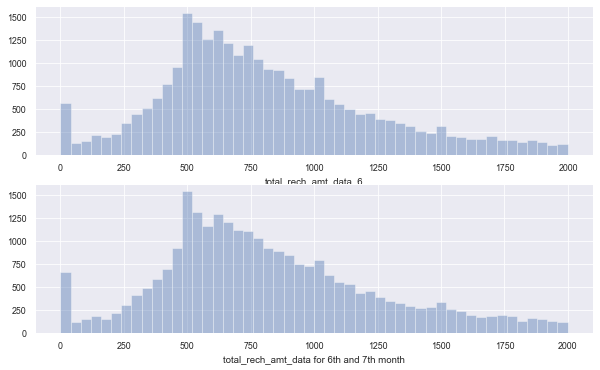

In [3031]:
fig3, ax3 = plt.subplots(2, figsize= FIGSIZE)
sns.distplot(clean_data.loc[clean_data["total_rech_amt_data_6"]<2000,"total_rech_amt_data_6"], kde=False, ax=ax3[0]);
sns.distplot(clean_data.loc[clean_data["total_rech_amt_data_7"]<2000,"total_rech_amt_data_7"], kde=False, ax=ax3[1]);
ax3[1].set_xlabel("total_rech_amt_data for 6th and 7th month");

**Variable : std_og_t2t_mou_6**

In [3032]:
values_eq_zero_6 = clean_data.loc[clean_data["std_og_t2t_mou_6"]==0,"std_og_t2t_mou_6"].value_counts().sum()
values_eq_zero_7 = clean_data.loc[clean_data["std_og_t2t_mou_7"]==0,"std_og_t2t_mou_7"].value_counts().sum()
values_eq_zero_8 = clean_data.loc[clean_data["std_og_t2t_mou_8"]==0,"std_og_t2t_mou_8"].value_counts().sum()

In [3033]:
print(f"% of values equal to 0 = {(values_eq_zero_6/clean_data['std_og_t2t_mou_6'].count())*100}")
print(f"% of values equal to 0 = {(values_eq_zero_7/clean_data['std_og_t2t_mou_7'].count())*100}")
print(f"% of values equal to 0 = {(values_eq_zero_8/clean_data['std_og_t2t_mou_8'].count())*100}")

% of values equal to 0 = 43.93216038460254
% of values equal to 0 = 44.31275665208827
% of values equal to 0 = 48.23223049444129


#### Observation
* The % of zero values in the std outgoing t2t variable is signinficant which makes the variable less important

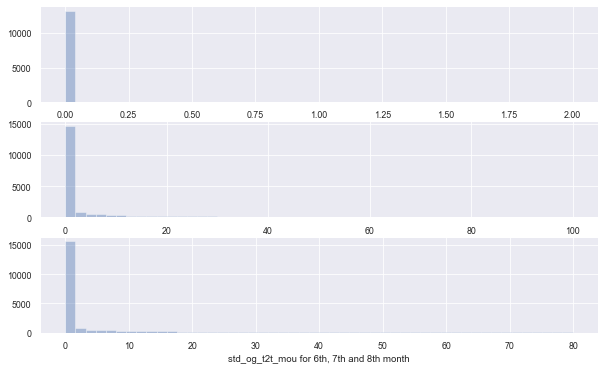

In [3034]:
fig4, ax4 = plt.subplots(3, figsize= FIGSIZE)
sns.distplot(clean_data.loc[clean_data["std_og_t2t_mou_6"].between(0,2),"std_og_t2t_mou_6"], kde=False, ax=ax4[0]);
sns.distplot(clean_data.loc[clean_data["std_og_t2t_mou_7"]< 100, "std_og_t2t_mou_7"], kde=False, ax=ax4[1]);
sns.distplot(clean_data.loc[clean_data["std_og_t2t_mou_8"]< 80, "std_og_t2t_mou_8"], kde=False, ax=ax4[2]);
ax4[2].set_xlabel("std_og_t2t_mou for 6th, 7th and 8th month");

#### Observation
* std_og_t2t_mou is very skewed results in small range with very less variations

**Variable : arpu**

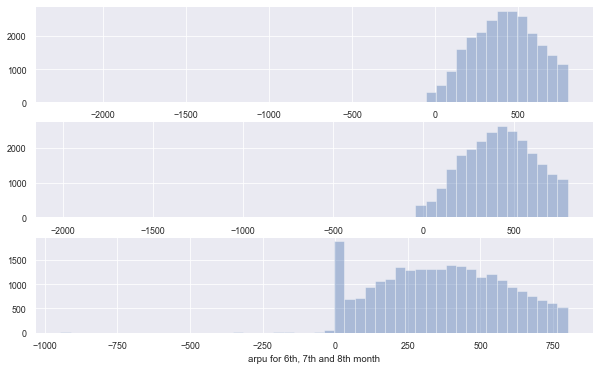

In [3035]:
fig5, ax5 = plt.subplots(3, figsize= FIGSIZE)
sns.distplot(clean_data.loc[clean_data["arpu_6"] < 800,"arpu_6"], kde=False, ax=ax5[0]);
sns.distplot(clean_data.loc[clean_data["arpu_7"] < 800,"arpu_7"], kde=False, ax=ax5[1]);
sns.distplot(clean_data.loc[clean_data["arpu_8"] < 800,"arpu_8"], kde=False, ax=ax5[2]);
ax5[2].set_xlabel("arpu for 6th, 7th and 8th month");


#### Observation
* arpu spread is more wide comaparing to 6th and 7th month
* On an average scale revenue looks less in relative to the 6th and 7th month 

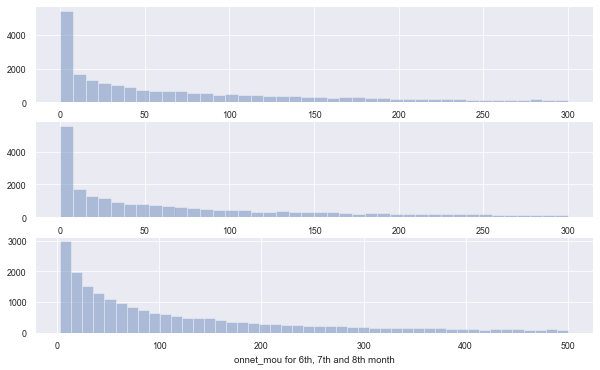

In [3036]:
fig6, ax6 = plt.subplots(3, figsize= FIGSIZE)
sns.distplot(clean_data.loc[clean_data["onnet_mou_6"] < 300, "onnet_mou_6"], kde=False, ax=ax6[0]);
sns.distplot(clean_data.loc[clean_data["onnet_mou_7"] < 300, "onnet_mou_7"], kde=False, ax=ax6[1]);
sns.distplot(clean_data.loc[clean_data["onnet_mou_8"].between(3,500), "onnet_mou_8"], kde=False, ax=ax6[2]);
ax6[2].set_xlabel("onnet_mou for 6th, 7th and 8th month");

#### Observation
* onnet is on neetwork usage which is skewed and showing falling pattern
* onnet usage fall rapidly in the 8th month compare to 6th and 7th month

**Variable: Offnet usage**

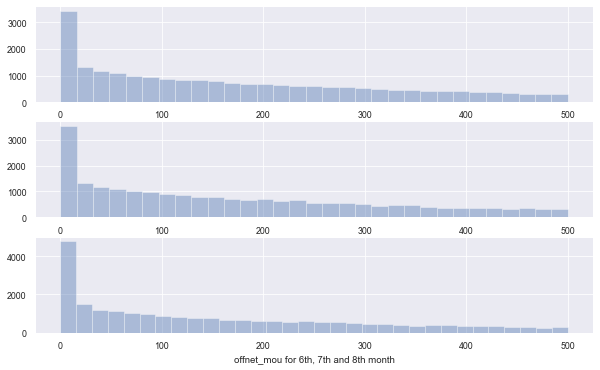

In [3037]:
fig7, ax7 = plt.subplots(3, figsize= FIGSIZE)
sns.distplot(clean_data.loc[clean_data["offnet_mou_6"] < 500, "offnet_mou_6"], kde=False, ax=ax7[0]);
sns.distplot(clean_data.loc[clean_data["offnet_mou_7"] < 500, "offnet_mou_7"], kde=False, ax=ax7[1]);
sns.distplot(clean_data.loc[clean_data["offnet_mou_8"] < 500, "offnet_mou_8"], kde=False, ax=ax7[2]);
ax7[2].set_xlabel("offnet_mou for 6th, 7th and 8th month");

#### Observation
* offnet usage doesn't show any significant visible difference for the 6th, 7th and 8th month

#### Variable : loc_og_t2t_mou_6

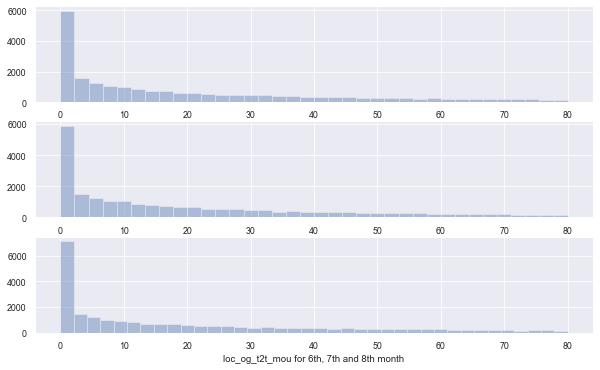

In [3038]:
fig8, ax8 = plt.subplots(3, figsize= FIGSIZE)
sns.distplot(clean_data.loc[clean_data["loc_og_t2t_mou_6"] < 80, "loc_og_t2t_mou_6"], kde=False, ax=ax8[0]);
sns.distplot(clean_data.loc[clean_data["loc_og_t2t_mou_7"] < 80, "loc_og_t2t_mou_7"], kde=False, ax=ax8[1]);
sns.distplot(clean_data.loc[clean_data["loc_og_t2t_mou_8"] < 80, "loc_og_t2t_mou_8"], kde=False, ax=ax8[2]);
ax8[2].set_xlabel("loc_og_t2t_mou for 6th, 7th and 8th month");

#### Observation
* offnet, onnet, loc t2t and std t2t variables data are highly skewed which implies the range is quite small

#### Variable : loc_og_t2m_mou_6

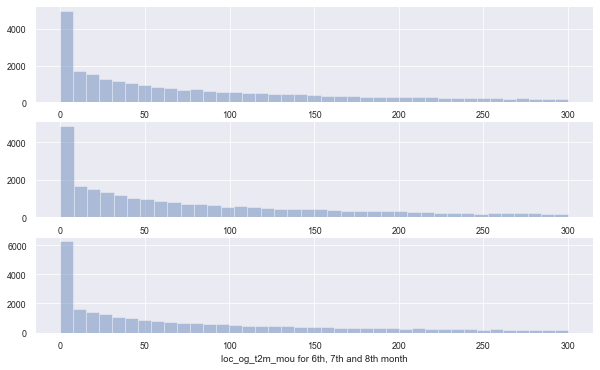

In [3039]:
fig8, ax8 = plt.subplots(3, figsize= FIGSIZE)
sns.distplot(clean_data.loc[clean_data["loc_og_t2m_mou_6"] < 300, "loc_og_t2m_mou_6"], kde=False, ax=ax8[0]);
sns.distplot(clean_data.loc[clean_data["loc_og_t2m_mou_7"] < 300, "loc_og_t2m_mou_7"], kde=False, ax=ax8[1]);
sns.distplot(clean_data.loc[clean_data["loc_og_t2m_mou_8"] < 300, "loc_og_t2m_mou_8"], kde=False, ax=ax8[2]);
ax8[2].set_xlabel("loc_og_t2m_mou for 6th, 7th and 8th month");

#### Outgoing variable analysis

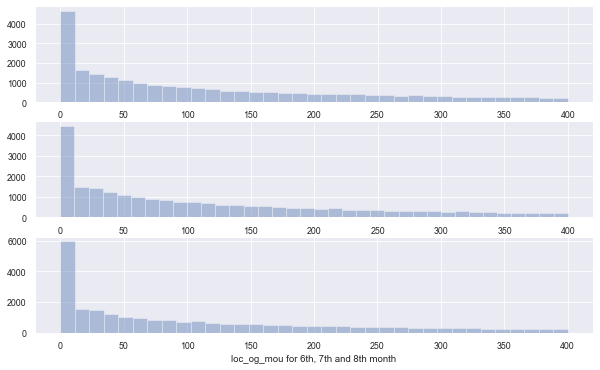

In [3040]:
fig9, ax9 = plt.subplots(3, figsize= FIGSIZE)
sns.distplot(clean_data.loc[clean_data["loc_og_mou_6"] < 400, "loc_og_mou_6"], kde=False, ax=ax9[0]);
sns.distplot(clean_data.loc[clean_data["loc_og_mou_7"] < 400, "loc_og_mou_7"], kde=False, ax=ax9[1]);
sns.distplot(clean_data.loc[clean_data["loc_og_mou_8"] < 400, "loc_og_mou_8"], kde=False, ax=ax9[2]);
ax9[2].set_xlabel("loc_og_mou for 6th, 7th and 8th month");

#### Observation
* local outgoing mou variable shows significant drop in the 8th month.

#### STD outgoing variable

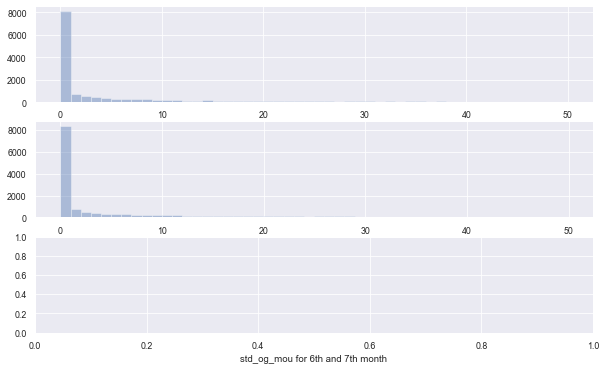

In [3041]:
fig10, ax10 = plt.subplots(3, figsize= FIGSIZE)
sns.distplot(clean_data.loc[clean_data["std_og_mou_6"] < 50, "std_og_mou_6"], kde=False, ax=ax10[0]);
sns.distplot(clean_data.loc[clean_data["std_og_mou_7"] < 50, "std_og_mou_7"], kde=False, ax=ax10[1]);
ax10[2].set_xlabel("std_og_mou for 6th and 7th month");

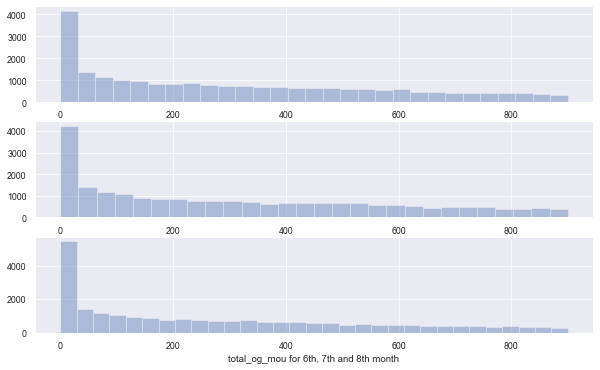

In [3042]:
fig11, ax11 = plt.subplots(3, figsize= FIGSIZE)
sns.distplot(clean_data.loc[clean_data["total_og_mou_6"] < 900, "total_og_mou_6"], kde=False, ax=ax11[0]);
sns.distplot(clean_data.loc[clean_data["total_og_mou_7"] < 900, "total_og_mou_7"], kde=False, ax=ax11[1]);
sns.distplot(clean_data.loc[clean_data["total_og_mou_8"] < 900, "total_og_mou_8"], kde=False, ax=ax11[2]);
ax11[2].set_xlabel("total_og_mou for 6th, 7th and 8th month");

#### Observation
* std outgoing is highly skewed which results in small range
* total outgoing call looks skewed and shows slightly uniform and falling 

#### Incoming Variables Analysis

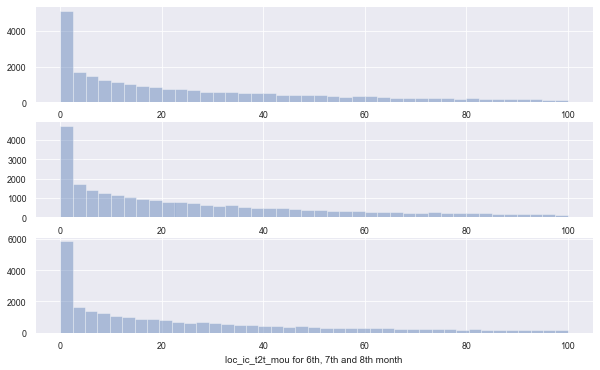

In [3043]:
fig12, ax12 = plt.subplots(3, figsize= FIGSIZE)
sns.distplot(clean_data.loc[clean_data["loc_ic_t2t_mou_6"] < 100, "loc_ic_t2t_mou_6"], kde=False, ax=ax12[0]);
sns.distplot(clean_data.loc[clean_data["loc_ic_t2t_mou_7"] < 100, "loc_ic_t2t_mou_7"], kde=False, ax=ax12[1]);
sns.distplot(clean_data.loc[clean_data["loc_ic_t2t_mou_8"] < 100, "loc_ic_t2t_mou_8"], kde=False, ax=ax12[2]);
ax12[2].set_xlabel("loc_ic_t2t_mou for 6th, 7th and 8th month");

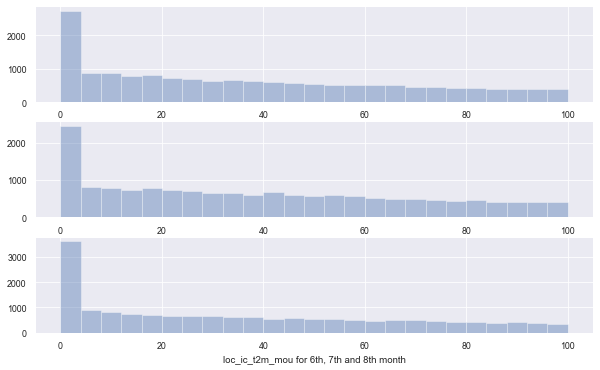

In [3044]:
fig13, ax13 = plt.subplots(3, figsize= FIGSIZE)
sns.distplot(clean_data.loc[clean_data["loc_ic_t2m_mou_6"] < 100, "loc_ic_t2m_mou_6"], kde=False, ax=ax13[0]);
sns.distplot(clean_data.loc[clean_data["loc_ic_t2m_mou_7"] < 100, "loc_ic_t2m_mou_7"], kde=False, ax=ax13[1]);
sns.distplot(clean_data.loc[clean_data["loc_ic_t2m_mou_8"] < 100, "loc_ic_t2m_mou_8"], kde=False, ax=ax13[2]);
ax13[2].set_xlabel("loc_ic_t2m_mou for 6th, 7th and 8th month");

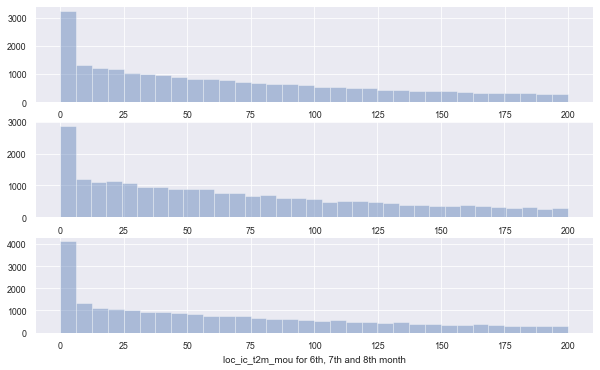

In [3045]:
fig14, ax14 = plt.subplots(3, figsize= FIGSIZE)
sns.distplot(clean_data.loc[clean_data["loc_ic_t2m_mou_6"] < 200, "loc_ic_t2m_mou_6"], kde=False, ax=ax14[0]);
sns.distplot(clean_data.loc[clean_data["loc_ic_t2m_mou_7"] < 200, "loc_ic_t2m_mou_7"], kde=False, ax=ax14[1]);
sns.distplot(clean_data.loc[clean_data["loc_ic_t2m_mou_8"] < 200, "loc_ic_t2m_mou_8"], kde=False, ax=ax14[2]);
ax14[2].set_xlabel("loc_ic_t2m_mou for 6th, 7th and 8th month");

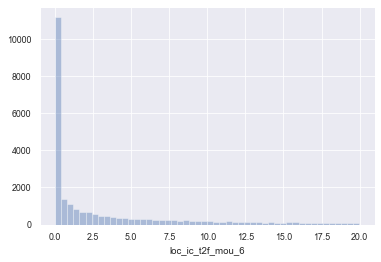

In [3046]:
sns.distplot(clean_data.loc[clean_data["loc_ic_t2f_mou_6"] < 20, "loc_ic_t2f_mou_6"], kde=False);

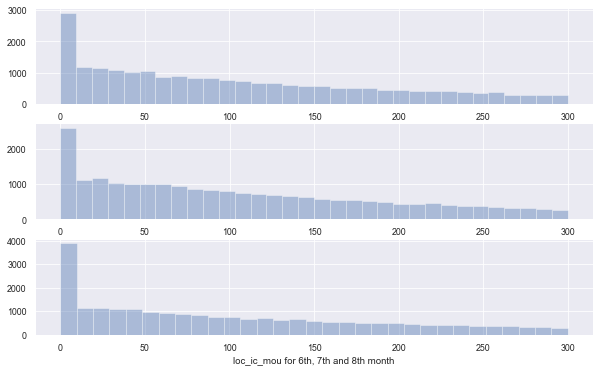

In [3047]:
fig15, ax15 = plt.subplots(3, figsize= FIGSIZE)
sns.distplot(clean_data.loc[clean_data["loc_ic_mou_6"] < 300, "loc_ic_mou_6"], kde=False, ax=ax15[0]);
sns.distplot(clean_data.loc[clean_data["loc_ic_mou_7"] < 300, "loc_ic_mou_7"], kde=False, ax=ax15[1]);
sns.distplot(clean_data.loc[clean_data["loc_ic_mou_8"] < 300, "loc_ic_mou_8"], kde=False, ax=ax15[2]);
ax15[2].set_xlabel("loc_ic_mou for 6th, 7th and 8th month");

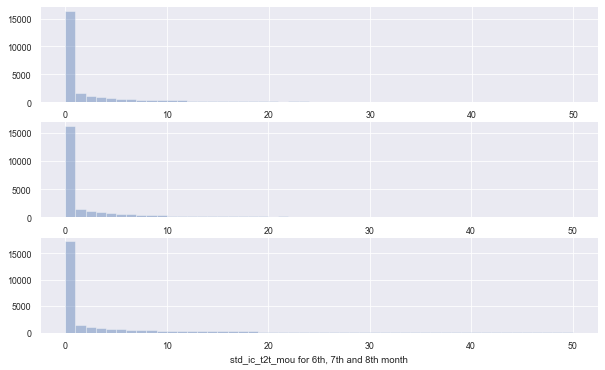

In [3048]:
fig16, ax16 = plt.subplots(3, figsize= FIGSIZE)
sns.distplot(clean_data.loc[clean_data["std_ic_t2t_mou_6"] < 50, "std_ic_t2t_mou_6"], kde=False, ax=ax16[0]);
sns.distplot(clean_data.loc[clean_data["std_ic_t2t_mou_7"] < 50, "std_ic_t2t_mou_7"], kde=False, ax=ax16[1]);
sns.distplot(clean_data.loc[clean_data["std_ic_t2t_mou_8"] < 50, "std_ic_t2t_mou_8"], kde=False, ax=ax16[2]);
ax16[2].set_xlabel("std_ic_t2t_mou for 6th, 7th and 8th month");

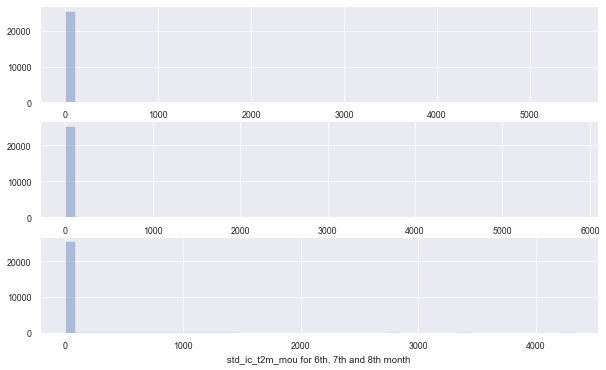

In [3049]:
fig17, ax17 = plt.subplots(3, figsize= FIGSIZE)
sns.distplot(clean_data.loc[clean_data["std_ic_t2m_mou_6"] < 50, "std_ic_t2t_mou_6"], kde=False, ax=ax17[0]);
sns.distplot(clean_data.loc[clean_data["std_ic_t2m_mou_7"] < 50, "std_ic_t2t_mou_7"], kde=False, ax=ax17[1]);
sns.distplot(clean_data.loc[clean_data["std_ic_t2m_mou_8"] < 50, "std_ic_t2t_mou_8"], kde=False, ax=ax17[2]);
ax17[2].set_xlabel("std_ic_t2m_mou for 6th, 7th and 8th month");

#### Observation:
* std incoming t2m and t2m are highly skewed doesnt give much space for variation
* loc incoming t2m and t2t are skewed but give some amount of space for variation

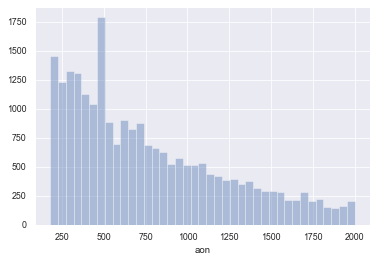

In [3050]:
sns.distplot(clean_data.loc[clean_data["aon"] < 2000, "aon"], kde=False);

> From the above histogram **aon** variable can be broken down to the below classes:
* 0-500
* 500-700
* 700-1100
* 1100-1600
* 1600-2000

In [3051]:
clean_data.loc[(clean_data["aon"]>=0) & (clean_data["aon"] < 500),     "user_tenure"] = "0-1 yrs"
clean_data.loc[(clean_data["aon"]>=500) & (clean_data["aon"] < 700),   "user_tenure"] = "1-2 yrs"
clean_data.loc[(clean_data["aon"]>=700) & (clean_data["aon"] < 1100),  "user_tenure"] = "2-3 yrs"
clean_data.loc[(clean_data["aon"]>=1100) & (clean_data["aon"] < 1600), "user_tenure"] = "3-4 yrs"
clean_data.loc[(clean_data["aon"]>=1600) & (clean_data["aon"] < 2000), "user_tenure"] = "3-4 yrs"

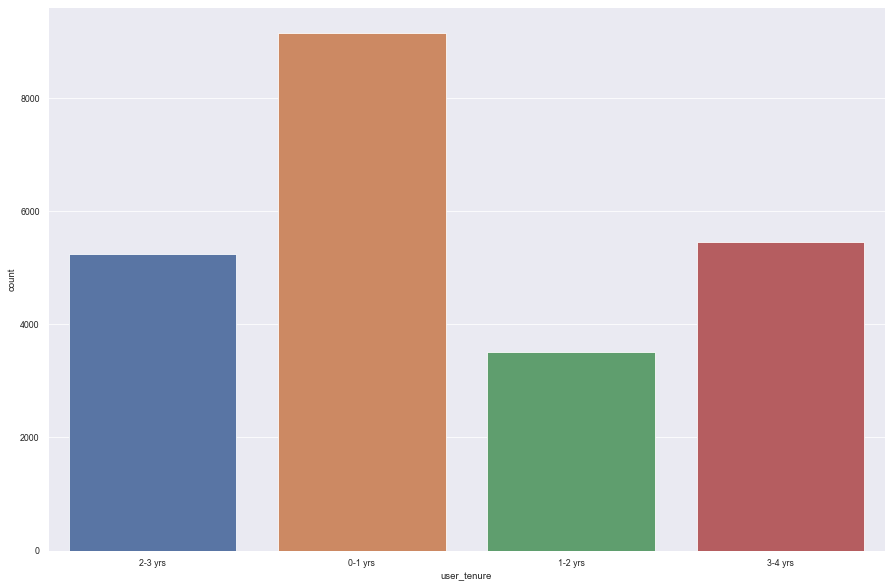

In [3052]:
fig18, ax18 = plt.subplots(figsize= (15,10))
sns.countplot(x="user_tenure", data=clean_data)

### Bivariate Analysis

Text(0.5, 1.0, 'Churned vs User_Tenure')

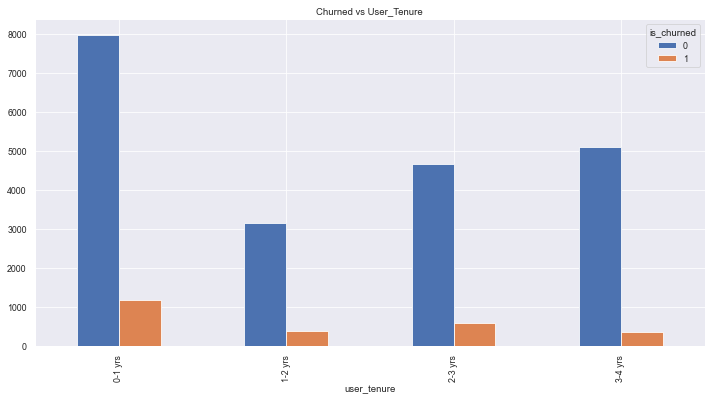

In [3053]:
fig19, ax19 = plt.subplots(figsize=(12,6))
pd.crosstab(clean_data.user_tenure,clean_data.is_churned).plot(kind='bar', ax=ax19)
plt.title('Churned vs User_Tenure')


#### Observation:
* The longer the user tenure the lesser instances of user is churned

In [3054]:
outgoing_vars_6 = []
outgoing_vars_7 = []
outgoing_vars_8 = []

for col in clean_data.columns:
    if "og" in col and "_6"  in col:
        outgoing_vars_6.append(col)
    
    elif "og" in col and "_7"  in col:
        outgoing_vars_7.append(col)
    
    elif "og" in col and "_8"  in col:
        outgoing_vars_8.append(col)
    
    else:
        None

In [3055]:
outgoing_vars_8

['roam_og_mou_8',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_8',
 'loc_og_mou_8',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_8',
 'std_og_mou_8',
 'isd_og_mou_8',
 'spl_og_mou_8',
 'og_others_8',
 'total_og_mou_8']

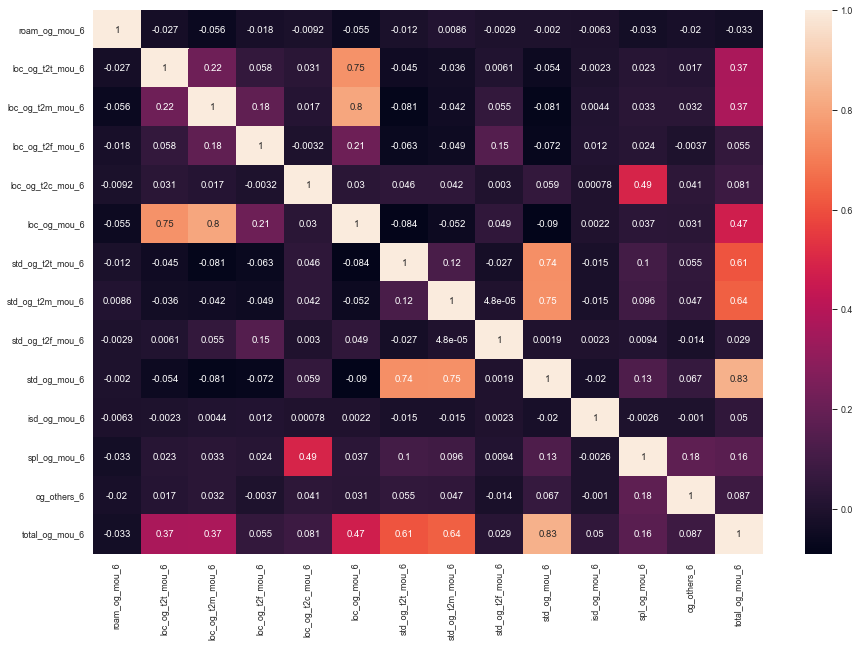

In [3056]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,10));
sns.heatmap(clean_data[outgoing_vars_6].corr(), ax=ax, annot=True);

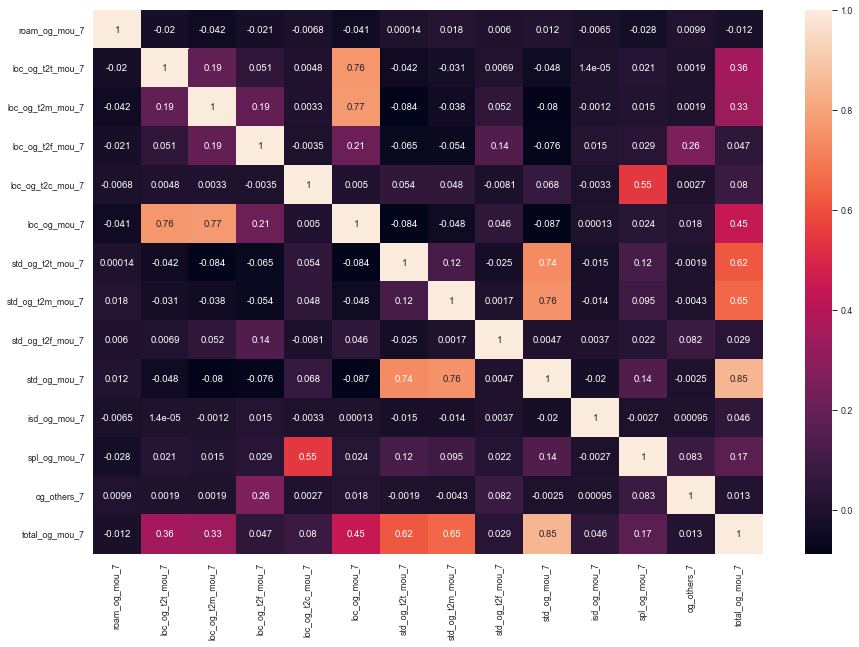

In [3057]:
fig, ax = plt.subplots(figsize=(15,10));
sns.heatmap(clean_data[outgoing_vars_7].corr(), ax=ax, annot=True);

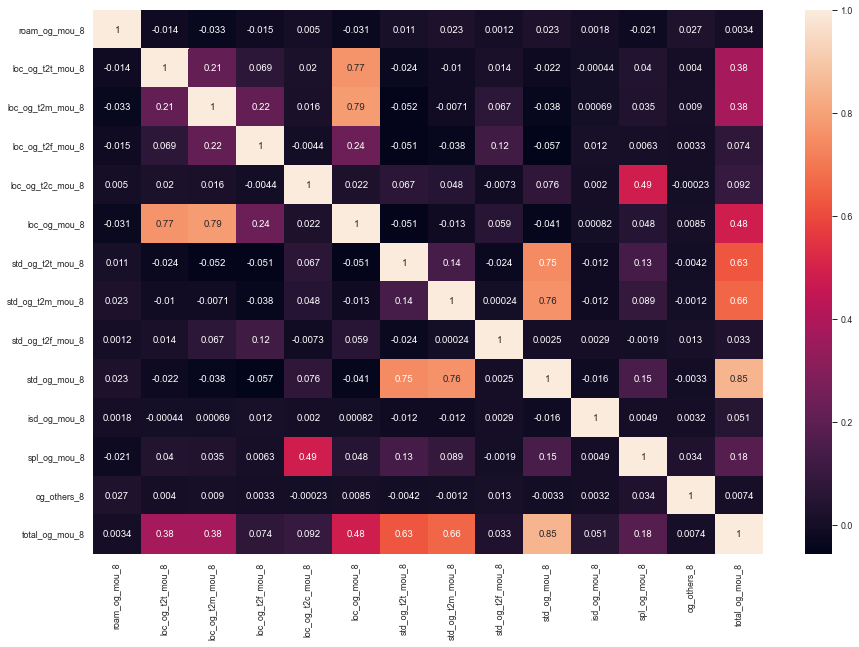

In [3058]:
fig, ax = plt.subplots(figsize=(15,10));
sns.heatmap(clean_data[outgoing_vars_8].corr(), ax=ax, annot=True);

> **Insights of the outgoing mou varaibles**:
<br>
* There are some STD, Local and Total outgoing variables have 70 to 80% correlation.
* Local outgoing and Local outgoing(t2m and t2f) have 70 to 80% correaltion
* Same pattern like Local outgoing variable is visible for the STD outgoing variables.


In [3059]:
clean_data["tes_corr_og_6"] = clean_data["std_og_mou_6"] + clean_data["loc_og_mou_6"] + \
clean_data["spl_og_mou_6"] + clean_data["isd_og_mou_6"] + clean_data["og_others_6"]

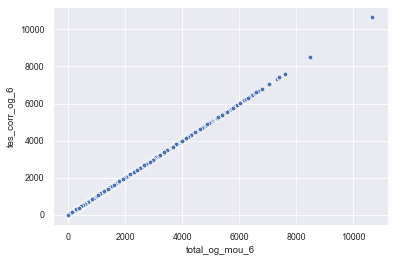

In [3060]:
sns.scatterplot(x= "total_og_mou_6", y="tes_corr_og_6", data=clean_data[["total_og_mou_6","tes_corr_og_6" ]]);

#### Relation
* total_og_mou_6 =  std_og_mou_6 + loc_og_mou_6 + spl_og_mou_6 + isd_og_mou_6 + og_others

In [3061]:
clean_data.drop("tes_corr_og_6", axis=1, inplace=True)

In [3062]:
outgoing_vars = outgoing_vars_6 + outgoing_vars_7 + outgoing_vars_8

In [3063]:
drop_outgoing_vars = []
for col in outgoing_vars:
    if ("t2t" not in col and "spl" not in col and "roam" not in col and "og_others" not in col and "isd" not in col) \
    and ("t2f" not in col) and ("t2c" not in col) \
    and ("t2m" not in col):
        drop_outgoing_vars.append(col)
    else:
        None

In [3064]:
drop_outgoing_vars

['loc_og_mou_6',
 'std_og_mou_6',
 'total_og_mou_6',
 'loc_og_mou_7',
 'std_og_mou_7',
 'total_og_mou_7',
 'loc_og_mou_8',
 'std_og_mou_8',
 'total_og_mou_8']

In [3065]:
# Dropping columns which are correlated with each other
clean_data.drop(drop_outgoing_vars, axis=1, inplace=True)

In [3066]:
clean_data.shape

(29953, 154)

In [3067]:
incoming_vars_6 = []
incoming_vars_7 = []
incoming_vars_8 = []

for col in clean_data.columns:
    if "ic" in col and "_6"  in col:
        incoming_vars_6.append(col)
    
    elif "ic" in col and "_7"  in col:
        incoming_vars_7.append(col)
    
    elif "ic" in col and "_8"  in col:
        incoming_vars_8.append(col)
    
    else:
        None

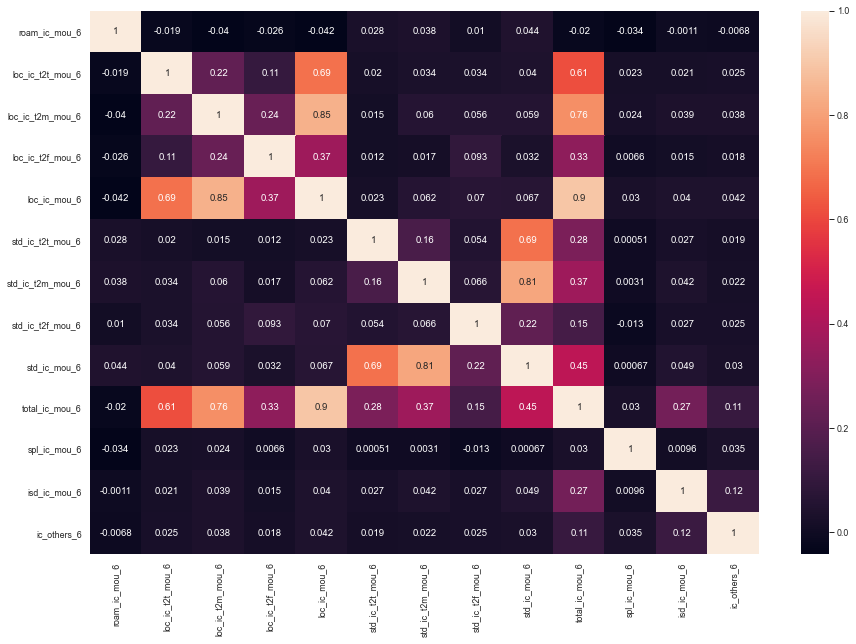

In [3068]:
fig, ax = plt.subplots(figsize=(15,10));
sns.heatmap(clean_data[incoming_vars_6].corr(), ax=ax, annot=True);


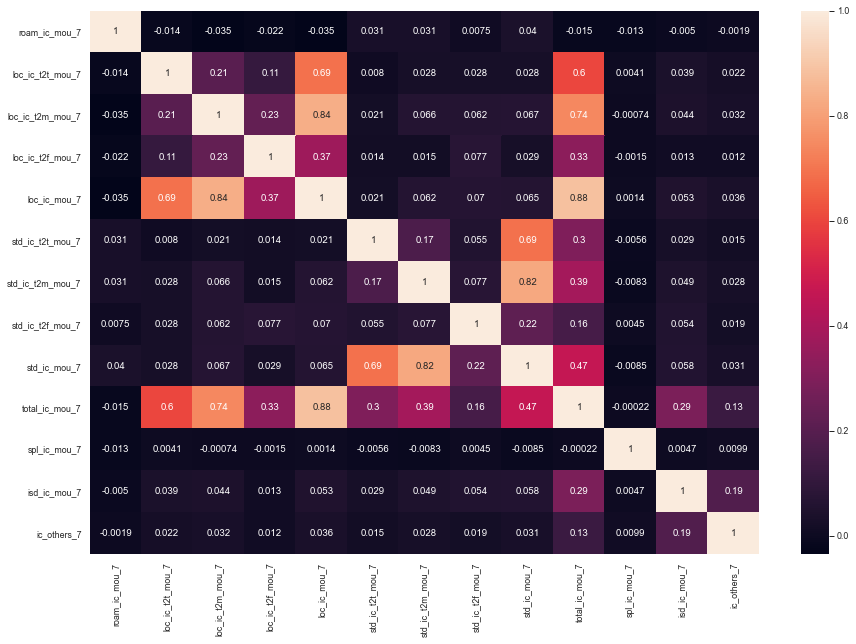

In [3069]:
fig, ax = plt.subplots(figsize=(15,10));
sns.heatmap(clean_data[incoming_vars_7].corr(), ax=ax, annot=True);

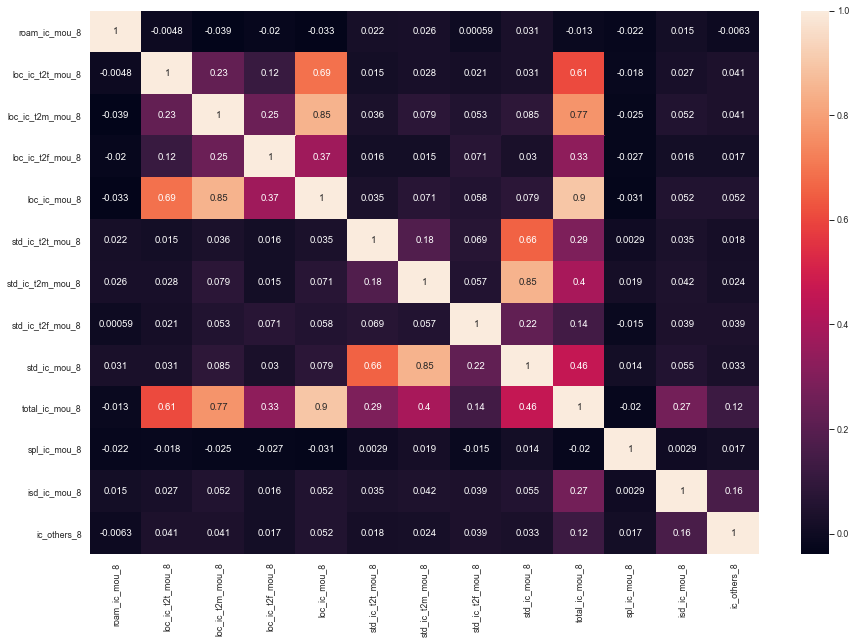

In [3070]:
fig, ax = plt.subplots(figsize=(15,10));
sns.heatmap(clean_data[incoming_vars_8].corr(), ax=ax, annot=True);

> **Insights of the incoming mou varaibles**:
<br>
* There are some STD, Local and Total incoming variables have 70 to 80% correlation.
* Local incoming and Local incoming(t2m and t2f) have 70 to 80% correaltion
* Same pattern like Local incoming variable is visible for the STD incoming variables.


In [3071]:
incoming_vars = incoming_vars_6 + incoming_vars_7 + incoming_vars_8


In [3072]:
drop_incoming_vars = []
for col in incoming_vars:
    if ("t2t" not in col and "spl" not in col and "roam" not in col and "ic_others" not in col and "isd" not in col) \
    and ("t2f" not in col) and ("t2c" not in col) \
    and ("t2m" not in col):
        drop_incoming_vars.append(col)
    else:
        None

In [3073]:
drop_incoming_vars

['loc_ic_mou_6',
 'std_ic_mou_6',
 'total_ic_mou_6',
 'loc_ic_mou_7',
 'std_ic_mou_7',
 'total_ic_mou_7',
 'loc_ic_mou_8',
 'std_ic_mou_8',
 'total_ic_mou_8']

In [3074]:
clean_data.drop(incoming_vars, axis=1, inplace=True)

In [3075]:
clean_data.shape

(29953, 115)

In [3076]:
clean_data.head()

last_date_of_month_8    arpu_6    arpu_7    arpu_8  onnet_mou_6  \
0   2014-08-31 00:00:00   197.385   214.816   213.803         0.00   
7   2014-08-31 00:00:00  1069.180  1349.850  3171.480        57.84   
8   2014-08-31 00:00:00   378.721   492.223   137.362       413.69   
21  2014-08-31 00:00:00   514.453   597.753   637.760       102.41   
23  2014-08-31 00:00:00    74.350   193.897   366.966        48.96   

    onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
0          0.00         0.00          0.00          0.00          0.00   
7         54.68        52.29        453.43        567.16        325.91   
8        351.03        35.08         94.66         80.63        136.48   
21       132.11        85.14        757.93        896.68        983.39   
23        50.66        33.58         85.41         89.36        205.89   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0            0.00           0.00           0.00              0.00   
7           23.74          12.59          38.06             51.39   
8            0.00           0.00           0.00            297.13   
21           0.00           0.00           0.00              4.48   
23           0.00           0.00           0.00             48.96   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0               0.00              0.00              0.00              0.00   
7              31.38             40.28            308.63            447.38   
8             217.59             12.49             80.96             70.58   
21              6.16             23.34             91.81             87.93   
23             50.66             33.58             82.94             83.01   

    loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0               0.00              0.00              0.00              0.00   
7             162.28             62.13             55.14             53.23   
8              50.54              0.00              0.00              0.00   
21            104.81              0.75              0.00              1.58   
23            148.56              0.00              0.00              0.00   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  std_og_t2t_mou_6  \
0                0.0               0.0              0.00              0.00   
7                0.0               0.0              0.00              4.30   
8                0.0               0.0              7.15            116.56   
21               0.0               0.0              0.00             97.93   
23               0.0               0.0             17.71              0.00   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0               0.00              0.00              0.00              0.00   
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
21            125.94             61.79            665.36            808.74   
23              0.00              0.00              2.36              6.35   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.00              0.00              0.00              0.00   
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
21            876.99              0.00              0.00              0.00   
23             39.61              0.00              0.00              0.00   

    isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  \
0            0.0          0.00          0.00           0.0           0.0   
7            0.0          0.18         10.01           4.5           0.0   
8            0.0          0.00          0.00           0.0           0.0   
21           0.0          0.00          0.00           0.0           0.0 

In [3077]:
col_3g_6 = []
col_2g_6 = []

col_3g_7 = []
col_2g_7 = []

col_3g_8 = []
col_2g_8 = []



for col in clean_data.columns:
    if "_3g" in col and "_6"  in col:
        col_3g_6.append(col)    
    
    elif "jun" in col:
        col_3g_6.append(col)
    
    elif "_2g" in col and "_6"  in col:
        col_2g_6.append(col)
    
    elif "_3g" in col and "_7"  in col:
        col_3g_7.append(col)
    
    elif "jul" in col:
        col_3g_7.append(col)
        
    elif "_2g" in col and "_7"  in col:
        col_2g_7.append(col)    
    
    elif "_3g" in col and "_8"  in col:
        col_3g_8.append(col)
    
    elif "aug" in col:
        col_3g_8.append(col)

    elif "_2g" in col and "_8"  in col:
        col_2g_8.append(col)    
    
    else:
        None

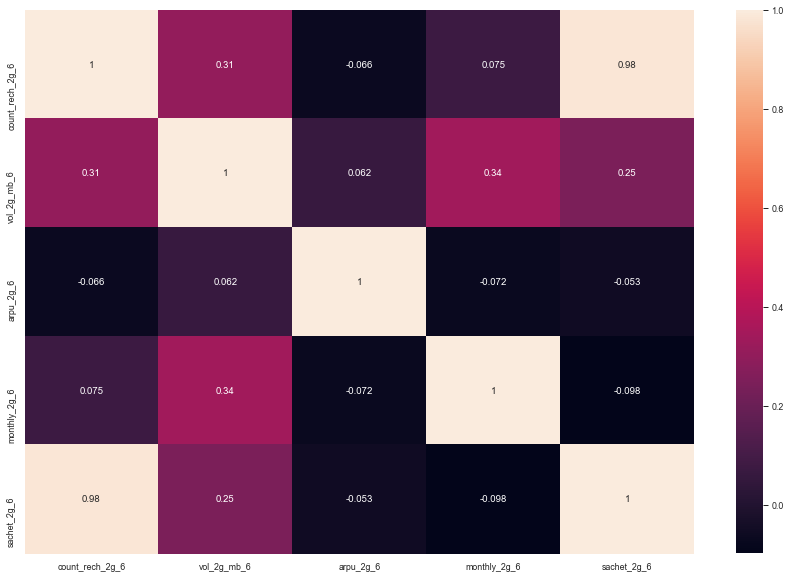

In [3078]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(clean_data[col_2g_6].corr(), annot=True, ax=ax)

#### Observation
* Strong correlation can be seen between 2G sachet and recharge count variables

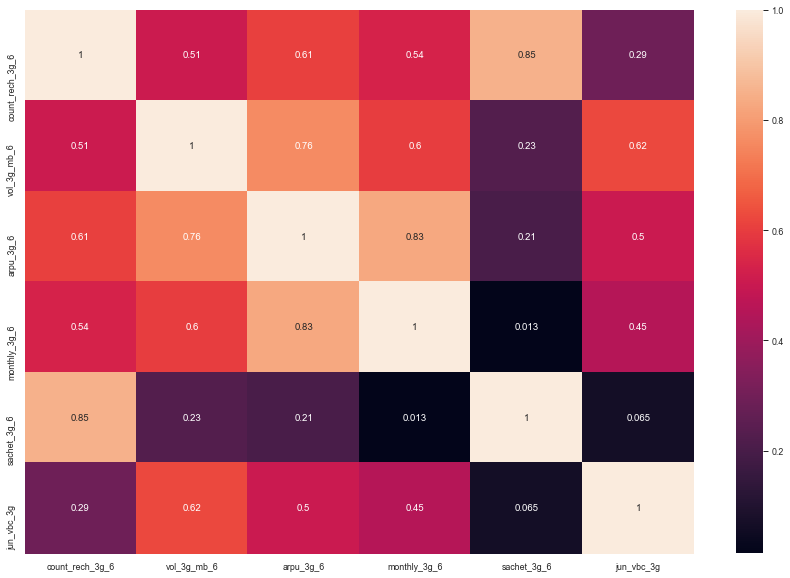

In [3079]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(clean_data[col_3g_6].corr(), annot=True, ax=ax)

#### Observation
* strong correlation between 3G monthly and arpu variables

In [3080]:
clean_data.head()

last_date_of_month_8    arpu_6    arpu_7    arpu_8  onnet_mou_6  \
0   2014-08-31 00:00:00   197.385   214.816   213.803         0.00   
7   2014-08-31 00:00:00  1069.180  1349.850  3171.480        57.84   
8   2014-08-31 00:00:00   378.721   492.223   137.362       413.69   
21  2014-08-31 00:00:00   514.453   597.753   637.760       102.41   
23  2014-08-31 00:00:00    74.350   193.897   366.966        48.96   

    onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
0          0.00         0.00          0.00          0.00          0.00   
7         54.68        52.29        453.43        567.16        325.91   
8        351.03        35.08         94.66         80.63        136.48   
21       132.11        85.14        757.93        896.68        983.39   
23        50.66        33.58         85.41         89.36        205.89   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0            0.00           0.00           0.00              0.00   
7           23.74          12.59          38.06             51.39   
8            0.00           0.00           0.00            297.13   
21           0.00           0.00           0.00              4.48   
23           0.00           0.00           0.00             48.96   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0               0.00              0.00              0.00              0.00   
7              31.38             40.28            308.63            447.38   
8             217.59             12.49             80.96             70.58   
21              6.16             23.34             91.81             87.93   
23             50.66             33.58             82.94             83.01   

    loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0               0.00              0.00              0.00              0.00   
7             162.28             62.13             55.14             53.23   
8              50.54              0.00              0.00              0.00   
21            104.81              0.75              0.00              1.58   
23            148.56              0.00              0.00              0.00   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  std_og_t2t_mou_6  \
0                0.0               0.0              0.00              0.00   
7                0.0               0.0              0.00              4.30   
8                0.0               0.0              7.15            116.56   
21               0.0               0.0              0.00             97.93   
23               0.0               0.0             17.71              0.00   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0               0.00              0.00              0.00              0.00   
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
21            125.94             61.79            665.36            808.74   
23              0.00              0.00              2.36              6.35   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.00              0.00              0.00              0.00   
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
21            876.99              0.00              0.00              0.00   
23             39.61              0.00              0.00              0.00   

    isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  \
0            0.0          0.00          0.00           0.0           0.0   
7            0.0          0.18         10.01           4.5           0.0   
8            0.0          0.00          0.00           0.0           0.0   
21           0.0          0.00          0.00           0.0           0.0 

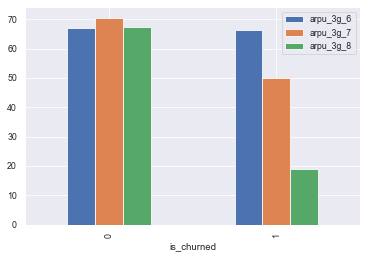

In [3081]:
pd.pivot_table(data=clean_data[["arpu_3g_6","arpu_3g_7","arpu_3g_8","is_churned"]], \
               index="is_churned", aggfunc="mean").plot(kind="bar")

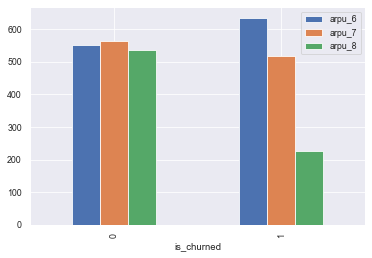

In [3082]:
pd.pivot_table(data=clean_data[["arpu_6","arpu_7","arpu_8","is_churned"]], \
               index="is_churned", aggfunc="mean").plot(kind="bar")

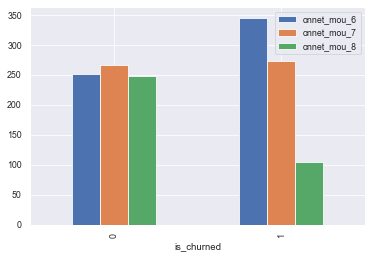

In [3083]:
pd.pivot_table(data=clean_data[["onnet_mou_6","onnet_mou_7", "onnet_mou_8","is_churned"]], \
               index="is_churned", aggfunc="mean").plot(kind="bar")

In [3084]:
pd.pivot_table(data=clean_data[["onnet_mou_6","onnet_mou_7", "onnet_mou_8","is_churned"]], \
               index="is_churned", aggfunc="mean")

onnet_mou_6  onnet_mou_7  onnet_mou_8
is_churned                                       
0            252.326299    267.46375   247.454238
1            345.924851    273.88219   104.358958

* There is an significant amount of drop in the onnetwork usage from 6th to 8th month 

In [3085]:
pd.pivot_table(data=clean_data[["offnet_mou_6", "offnet_mou_7", "offnet_mou_8","is_churned"]], \
               index="is_churned", aggfunc="mean")

offnet_mou_6  offnet_mou_7  offnet_mou_8
is_churned                                          
0             366.507228    379.998787    355.912753
1             446.118167    360.724938    128.975722

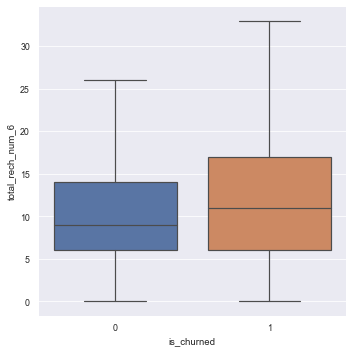

In [3086]:
sns.catplot(x="is_churned", y="total_rech_num_6", data=clean_data, kind="box", showfliers=False);

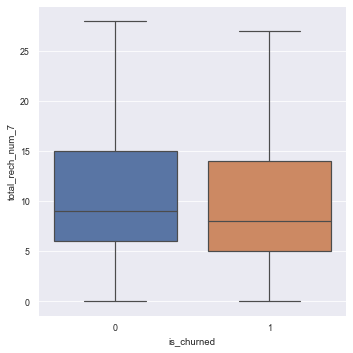

In [3087]:
sns.catplot(x="is_churned", y="total_rech_num_7", data=clean_data, kind="box", showfliers=False)


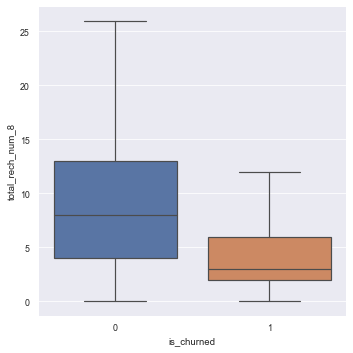

In [3088]:
sns.catplot(x="is_churned", y="total_rech_num_8", data=clean_data, kind="box", showfliers=False)

In [3089]:
pd.pivot_table(data=clean_data[["total_rech_num_6", "total_rech_num_7", "total_rech_num_8","is_churned"]], \
               index="is_churned", aggfunc="sum")

total_rech_num_6  total_rech_num_7  total_rech_num_8
is_churned                                                      
0                     317770            320569            284818
1                      37287             30619             13981

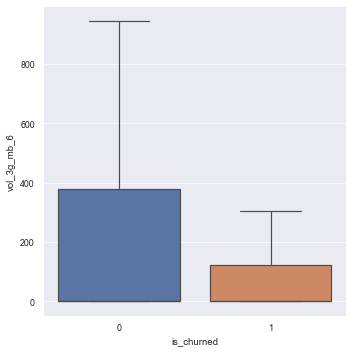

In [3090]:
sns.catplot(x="is_churned", y="vol_3g_mb_6", data=clean_data, kind="box", showfliers=False)


In [3091]:
pd.pivot_table(data=clean_data[["vol_3g_mb_6", "vol_3g_mb_7", "vol_3g_mb_8","is_churned"]], \
               index="is_churned", aggfunc="mean")

vol_3g_mb_6  vol_3g_mb_7  vol_3g_mb_8
is_churned                                       
0            349.940540   384.211649   377.182187
1            292.340452   235.027598   100.442577

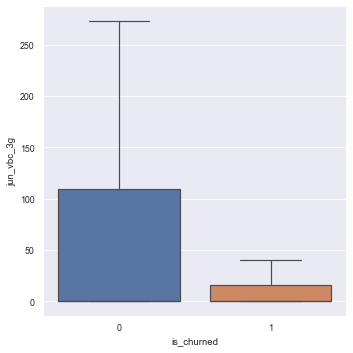

In [3092]:
sns.catplot(x="is_churned", y="jun_vbc_3g", data=clean_data, kind="box", showfliers=False)

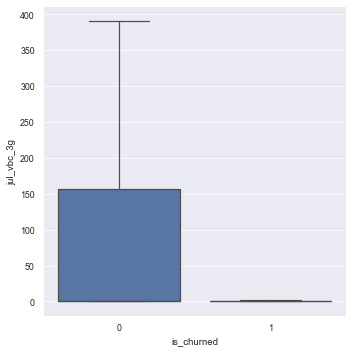

In [3093]:
sns.catplot(x="is_churned", y="jul_vbc_3g", data=clean_data, kind="box", showfliers=False)

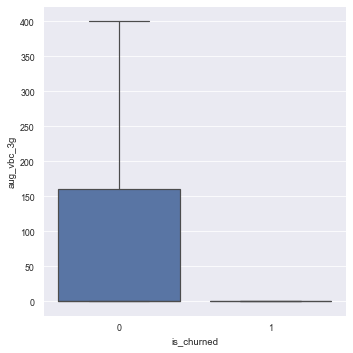

In [3094]:
sns.catplot(x="is_churned", y="aug_vbc_3g", data=clean_data, kind="box", showfliers=False)

In [3095]:
pd.pivot_table(data=clean_data[["jun_vbc_3g","jul_vbc_3g","aug_vbc_3g","is_churned"]], \
               index="is_churned", aggfunc="mean")

aug_vbc_3g  jul_vbc_3g  jun_vbc_3g
is_churned                                    
0           181.568291  186.357353  162.349119
1            47.395222  106.674909  122.863837

In [3096]:
pd.pivot_table(data=clean_data[["fb_user_6", "fb_user_7", "fb_user_8","is_churned"]], \
               index="is_churned", aggfunc="sum")

fb_user_6  fb_user_7  fb_user_8
is_churned                                 
0             14272.0    14647.0    13826.0
1              1239.0     1058.0      471.0

In [3097]:
["monthly_3g_6", "monthly_3g_7", "monthly_3g_8"]
pd.pivot_table(data=clean_data[["monthly_3g_6", "monthly_3g_7", "monthly_3g_8","is_churned"]], \
               index="is_churned", aggfunc="sum")

monthly_3g_6  monthly_3g_7  monthly_3g_8
is_churned                                          
0                   5979          6463          6162
1                    553           407           166

In [3098]:
pd.pivot_table(data=clean_data[["monthly_2g_6", "monthly_2g_7", "monthly_2g_8","is_churned"]], \
               index="is_churned", aggfunc="sum")

monthly_2g_6  monthly_2g_7  monthly_2g_8
is_churned                                          
0                   4938          5260          4515
1                    288           227            84

#### Bivariate analysis summary
* Signinficant amount of drop in the monthly, volume based cost, data volume and total recharge usage
* Same can be observed for the total recharge, onnetwork, offnetwork and average revenue per user variables
* Same pattern can be observed for the Facebook usage variable
* When user tenure is high, the chances of user churning is less probable 

In [3099]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Columns: 115 entries, last_date_of_month_8 to user_tenure
dtypes: datetime64[ns](2), float64(81), int64(26), object(6)
memory usage: 27.8+ MB


In [3100]:
col_6 = []
col_7 = []
for col in clean_data.columns:
    if "_6" in col:
        col_6.append(col)
    
    elif "_7" in col:
        col_7.append(col)
    
    else:
        None

In [3101]:
col_6 = col_6[:-1]

In [3102]:
col_7 = col_7[:-1]

#### Normalizing 6th and 7th month variables to balance with the 8th month variables.

In [3103]:
for col in zip(col_6,col_7):
    clean_data["avg_"+col[0]+"_"+"7"] = clean_data[list(col)].mean(axis=1)
    clean_data.drop(list(col), axis=1, inplace=True)


In [3104]:
clean_data["avg_jul_aug"] = clean_data[["jul_vbc_3g", "aug_vbc_3g"]].mean(axis=1)

In [3105]:
clean_data.drop(["jul_vbc_3g", "aug_vbc_3g"], axis=1, inplace=True)

In [3106]:
clean_data.head()

last_date_of_month_8    arpu_8  onnet_mou_8  offnet_mou_8  roam_og_mou_8  \
0   2014-08-31 00:00:00   213.803         0.00          0.00           0.00   
7   2014-08-31 00:00:00  3171.480        52.29        325.91          38.06   
8   2014-08-31 00:00:00   137.362        35.08        136.48           0.00   
21  2014-08-31 00:00:00   637.760        85.14        983.39           0.00   
23  2014-08-31 00:00:00   366.966        33.58        205.89           0.00   

    loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
0               0.00              0.00              0.00              0.00   
7              40.28            162.28             53.23              0.00   
8              12.49             50.54              0.00              7.15   
21             23.34            104.81              1.58              0.00   
23             33.58            148.56              0.00             17.71   

    std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  isd_og_mou_8  \
0               0.00              0.00              0.00          0.00   
7              12.01             49.14             16.68         10.01   
8              22.58             75.69              0.00          0.00   
21             61.79            876.99              0.00          0.00   
23              0.00             39.61              0.00          0.00   

    spl_og_mou_8  og_others_8  total_rech_num_8  total_rech_amt_8  \
0           0.00          0.0                 2               252   
7           6.50          0.0                 7              3638   
8          10.23          0.0                14               120   
21          0.00          0.0                27               718   
23         17.71          0.0                 4               439   

    max_rech_amt_8  date_of_last_rech_8  last_day_rch_amt_8  \
0              252  2014-08-08 00:00:00                 252   
7             1580  2014-08-26 00:00:00                 779   
8               30  2014-08-30 00:00:00                  10   
21              50  2014-08-31 00:00:00                  50   
23             179  2014-08-24 00:00:00                   0   

   date_of_last_rech_data_8  total_rech_data_8  max_rech_data_8  \
0       2014-08-08 00:00:00              252.0            252.0   
7                         0                0.0              0.0   
8       2014-08-23 00:00:00              207.0             23.0   
21                        0                0.0              0.0   
23      2014-08-06 00:00:00              540.0            179.0   

    count_rech_2g_8  count_rech_3g_8  av_rech_amt_data_8  vol_2g_mb_8  \
0               0.0              1.0               252.0         5.75   
7               0.0              0.0                 0.0         0.00   
8               3.0              0.0                69.0         0.03   
21              0.0              0.0                 0.0         0.00   
23              0.0              2.0               270.0         0.01   

    vol_3g_mb_8  arpu_3g_8  arpu_2g_8  night_pck_user_8  monthly_2g_8  \
0        109.61     212.17     212.17               0.0             0   
7          0.00       0.00       0.00               0.0             0   
8         11.94      19.83       0.00               0.0             0   
21         0.00       0.00       0.00               0.0             0   
23      1009.92     197.27     150.67               0.0             0   

    sachet_2g_8  monthly_3g_8  sachet_3g_8  fb_user_8  aon  jun_vbc_3g  \
0             0             1            0        1.0  968      101.20   
7             0             0            0        0.0  802       18.74   
8             3             0            0        1.0  315      122.16   
21            0             0            0        0.0  720        0.00   
23            0             1            1        1.0  604        0.00   

    is_churned  total_rech_amt_data_6  total_rech_amt_data_7  \
0            1                

In [3107]:
date_cols = []
for col in clean_data.columns:
    if "date" in col:
        date_cols.append(col)

In [3108]:
clean_data.drop(date_cols, axis=1, inplace=True)

### Model Building

In [3323]:
model_data = clean_data.copy()

In [3324]:
model_data.shape

(29953, 74)

In [3325]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
model_data['user_tenure'] = le.fit_transform(model_data['user_tenure'].astype('str'))

In [3326]:
model_data.drop("aon", axis=1, inplace=True)

In [3327]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

In [3328]:
def calculate_vif(X):
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(X.values, X_val) for X_val in range(X.shape[1])]
    vif["features"] = X.columns
#     print(tabulate(vif, headers='keys', tablefmt="grid"))
    return vif

In [3329]:
X = model_data.drop("is_churned", inplace=False, axis=1)
y = model_data["is_churned"]

In [3330]:
y.value_counts()/y.value_counts().sum()

0    0.90839
1    0.09161
Name: is_churned, dtype: float64

#### Using SMOTE to fix class imbalance issue

In [3331]:
smote_blncd = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.3, random_state=0)
columns = X_train.columns

smote_blncd_X, smote_blncd_y = smote_blncd.fit_sample(X_train, y_train)
smote_blncd_X = pd.DataFrame(data=smote_blncd_X, columns=columns )
smote_blncd_y= pd.DataFrame(data=smote_blncd_y,columns=['is_churned'])
print("Number of churned", len(smote_blncd_y[smote_blncd_y["is_churned"]==0])/len(smote_blncd_y))
print("Number of non-churned", len(smote_blncd_y[smote_blncd_y["is_churned"]==1])/len(smote_blncd_y))

Number of churned 0.5
Number of non-churned 0.5


In [3332]:
X=smote_blncd_X
y=smote_blncd_y['is_churned']

In [3333]:
vif_report = calculate_vif(X)

C:\Users\monis\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [3334]:
vif_report.loc[vif_report["VIF Factor"] == np.inf, "features"].to_list()

['total_rech_amt_data_6',
 'total_rech_amt_data_7',
 'avg_rech_amt_gdphase_6_7',
 'avg_total_rech_amt_6_7',
 'avg_total_rech_data_6_7',
 'avg_count_rech_2g_6_7',
 'avg_count_rech_3g_6_7',
 'avg_monthly_2g_6_7',
 'avg_sachet_2g_6_7',
 'avg_monthly_3g_6_7',
 'avg_sachet_3g_6_7']

In [3335]:
vif_report.sort_values(by="VIF Factor")

VIF Factor                  features
13  1.020252e+00               og_others_8
51  1.126879e+00         avg_og_others_6_7
27  1.409694e+00          night_pck_user_8
65  1.448939e+00    avg_night_pck_user_6_7
7   1.774469e+00          loc_og_t2c_mou_8
45  1.853359e+00    avg_loc_og_t2c_mou_6_7
37  2.173305e+00               user_tenure
23  2.173450e+00               vol_2g_mb_8
33  2.426228e+00                jun_vbc_3g
61  2.647517e+00         avg_vol_2g_mb_6_7
71  2.729963e+00               avg_jul_aug
17  2.935546e+00        last_day_rch_amt_8
55  4.005232e+00  avg_last_day_rch_amt_6_7
10  4.183995e+00          std_og_t2f_mou_8
12  5.225935e+00              spl_og_mou_8
28  5.305618e+00              monthly_2g_8
24  5.651411e+00               vol_3g_mb_8
48  5.705950e+00    avg_std_og_t2f_mou_6_7
18  5.777532e+00         total_rech_data_8
16  6.525854e+00            max_rech_amt_8
14  6.748751e+00          total_rech_num_8
62  7.174467e+00         avg_vol_3g_mb_6_7
32  7.446982e+00                 fb_user_8
52  8.467984e+00    avg_total_rech_num_6_7
54  8.479852e+00      avg_max_rech_amt_6_7
6   8.653561e+00          loc_og_t2f_mou_8
50  1.014743e+01        avg_spl_og_mou_6_7
70  1.112355e+01           avg_fb_user_6_7
19  1.162486e+01           max_rech_data_8
25  1.207495e+01                 arpu_3g_8
44  1.327866e+01    avg_loc_og_t2f_mou_6_7
57  1.500257e+01     avg_max_rech_data_6_7
26  1.692853e+01                 arpu_2g_8
63  1.780981e+01           avg_arpu_3g_6_7
30  2.013176e+01              monthly_3g_8
22  2.097355e+01        av_rech_amt_data_8
64  2.305822e+01           avg_arpu_2g_6_7
60  3.021962e+01  avg_av_rech_amt_data_6_7
0   3.382456e+01                    arpu_8
15  3.576506e+01          total_rech_amt_8
11  3.746702e+01              isd_og_mou_8
31  5.164445e+01               sachet_3g_8
49  6.338669e+01        avg_isd_og_mou_6_7
38  7.616998e+01              avg_arpu_6_7
21  8.018034e+01           count_rech_3g_8
29  1.474497e+02               sachet_2g_8
20  1.653042e+02           count_rech_2g_8
3   2.892511e+02             roam_og_mou_8
41  5.174727e+02       avg_roam_og_mou_6_7
4   7.847020e+02          loc_og_t2t_mou_8
5   1.059113e+03          loc_og_t2m_mou_8
42  1.498455e+03    avg_loc_og_t2t_mou_6_7
43  2.300542e+03    avg_loc_og_t2m_mou_6_7
9   2.742132e+03          std_og_t2m_mou_8
8   2.907858e+03          std_og_t2t_mou_8
1   4.164332e+03               onnet_mou_8
2   4.902368e+03              offnet_mou_8
46  8.355300e+03    avg_std_og_t2t_mou_6_7
47  8.388136e+03    avg_std_og_t2m_mou_6_7
39  1.104044e+04         avg_onnet_mou_6_7
40  1.356164e+04        avg_offnet_mou_6_7
58           inf     avg_count_rech_2g_6_7
56           inf   avg_total_rech_data_6_7
53           inf    avg_total_rech_amt_6_7
34           inf     total_rech_amt_data_6
36           inf  avg_rech_amt_gdphase_6_7
66           inf        avg_monthly_2g_6_7
67           inf         avg_sachet_2g_6_7
68           inf        avg_monthly_3g_6_7
69           inf         avg_sachet_3g_6_7
59           inf     avg_count_rech_3g_6_7
35           inf     total_rech_amt_data_7

In [2822]:
vif_report = calculate_vif(X)
len(vif_report.sort_values(by="VIF Factor"))

62

In [3337]:
X.drop(vif_report.loc[vif_report["VIF Factor"] == np.inf, "features"].to_list(), axis = 1)

arpu_8  onnet_mou_8  offnet_mou_8  roam_og_mou_8  \
0       462.828000    24.530000    206.530000       0.000000   
1       555.934000   343.090000    320.260000      64.590000   
2       456.258000    68.440000    292.980000       0.000000   
3      1737.551000   183.710000   3577.860000       0.000000   
4       748.646000    59.390000    983.360000       0.000000   
...            ...          ...           ...            ...   
38083   216.962236    56.148866     54.648308      17.843376   
38084   170.497620    63.820289     75.046685     138.876974   
38085    88.759965     0.175752      1.972290       0.000000   
38086   934.148315   295.196964    503.922446     138.422169   
38087    65.189204     2.439456     21.681007       7.391460   

       loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
0             24.530000        177.890000          0.000000          0.000000   
1            217.610000        214.280000          0.000000          0.000000   
2             68.290000        205.410000          6.340000          0.000000   
3             86.460000        142.980000         10.660000          0.000000   
4             30.190000        220.680000          1.930000          1.300000   
...                 ...               ...               ...               ...   
38083         11.701809         13.176427          0.554964          0.000000   
38084          0.000000          0.000000          0.000000          0.000000   
38085          0.175752          1.880594          0.087876          0.000000   
38086        142.593328        217.225133          0.437149          1.073849   
38087          0.539056          3.873892          0.000000          0.000000   

       std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  isd_og_mou_8  \
0              0.000000          0.000000          21.73000           0.0   
1             82.780000         84.080000           0.00000           0.0   
2              0.150000         81.210000           0.00000           0.0   
3             97.240000       3424.210000           0.00000           0.0   
4             29.190000        750.230000           0.00000           0.0   
...                 ...               ...               ...           ...   
38083         32.272468          0.570820          34.66674           0.0   
38084          0.000000          0.000000           0.00000           0.0   
38085          0.000000          0.000000           0.00000           0.0   
38086        126.124887        174.301670           0.00000           0.0   
38087          1.603463         10.708023           0.00000           0.0   

       spl_og_mou_8  og_others_8  total_rech_num_8  total_rech_amt_8  \
0          6.900000          0.0                 4               532   
1          1.900000          0.0                 9               683   
2          0.000000          0.0                 3               488   
3          6.510000          0.0                38              1990   
4         20.990000          0.0                20               880   
...             ...          ...               ...               ...   
38083      0.000000          0.0                 2                23   
38084      0.000000          0.0                 4               251   
38085      0.412635          0.0                 3               103   
38086      0.000000          0.0                 9              1075   
38087      0.000000          0.0                 2                 0   

       max_rech_amt_8  last_day_rch_amt_8  total_rech_data_8  max_rech_data_8  \
0                 144                 130           0.000000         0.000000   
1                 130                  50           0.000000         0.000000   
2                 169                 169           0.000000         0.000000   
3                 198                  20         446.000000       198.000000   
4                  77                  50           0.000000         0.0000

In [3338]:
X = X[vif_report.loc[vif_report["VIF Factor"] < 5, "features"].to_list()]

In [3339]:
X=smote_blncd_X
y=smote_blncd_y['is_churned']

In [3340]:
X.head()

arpu_8  onnet_mou_8  offnet_mou_8  roam_og_mou_8  loc_og_t2t_mou_8  \
0   462.828        24.53        206.53           0.00             24.53   
1   555.934       343.09        320.26          64.59            217.61   
2   456.258        68.44        292.98           0.00             68.29   
3  1737.551       183.71       3577.86           0.00             86.46   
4   748.646        59.39        983.36           0.00             30.19   

   loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  std_og_t2t_mou_8  \
0            177.89              0.00               0.0              0.00   
1            214.28              0.00               0.0             82.78   
2            205.41              6.34               0.0              0.15   
3            142.98             10.66               0.0             97.24   
4            220.68              1.93               1.3             29.19   

   std_og_t2m_mou_8  std_og_t2f_mou_8  isd_og_mou_8  spl_og_mou_8  \
0              0.00             21.73           0.0          6.90   
1             84.08              0.00           0.0          1.90   
2             81.21              0.00           0.0          0.00   
3           3424.21              0.00           0.0          6.51   
4            750.23              0.00           0.0         20.99   

   og_others_8  total_rech_num_8  total_rech_amt_8  max_rech_amt_8  \
0          0.0                 4               532             144   
1          0.0                 9               683             130   
2          0.0                 3               488             169   
3          0.0                38              1990             198   
4          0.0                20               880              77   

   last_day_rch_amt_8  total_rech_data_8  max_rech_data_8  count_rech_2g_8  \
0                 130                0.0              0.0              0.0   
1                  50                0.0              0.0              0.0   
2                 169                0.0              0.0              0.0   
3                  20              446.0            198.0              2.0   
4                  50                0.0              0.0              0.0   

   count_rech_3g_8  av_rech_amt_data_8  vol_2g_mb_8  vol_3g_mb_8  arpu_3g_8  \
0              0.0                 0.0         0.00         0.00       0.00   
1              0.0                 0.0         0.00         0.00       0.00   
2              0.0                 0.0         0.00         0.00       0.00   
3              0.0               223.0         8.34      2300.55       0.02   
4              0.0                 0.0         0.00         0.00       0.00   

   arpu_2g_8  night_pck_user_8  monthly_2g_8  sachet_2g_8  monthly_3g_8  \
0        0.0               0.0             0            0             0   
1        0.0               0.0             0            0             0   
2        0.0               0.0             0            0             0   
3        0.0               0.0             1            1             0   
4        0.0               0.0             0            0             0   

   sachet_3g_8  fb_user_8  jun_vbc_3g  total_rech_amt_data_6  \
0            0        0.0        4.24                  440.0   
1            0        0.0        0.00                  550.0   
2            0        0.0        0.00                  458.0   
3            0        1.0      239.35                 1751.0   
4            0        0.0        0.00                  483.0   

   total_rech_amt_data_7  avg_rech_amt_gdphase_6_7  user_tenure  avg_arpu_6_7  \
0                  980.0                     710.0            4      357.5730   
1                  647.0                     598.5            0      487.4955   
2                  598.0                     528.0            3      420.1190   
3                 2318.0                    2034.5            0     1357.7660   
4                  730.0                     606.5            2      5

In [3341]:
## Transforming input data to standardize it
scaler = preprocessing.StandardScaler()
X_transformed = scaler.fit_transform(X)

<center><h3>Logistic Regression Model</h3></center>

---

In [3342]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X[imp_features], y, \
                                                    train_size=0.7,test_size=0.3,random_state=100)

In [3343]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             is_churned   No. Observations:                26661
Model:                            GLM   Df Residuals:                    26641
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10629.
Date:                Mon, 31 Aug 2020   Deviance:                       21258.
Time:                        22:06:33   Pearson chi2:                 1.80e+07
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        1.7074      0.055     30.877      0.000       1.599       1.816
onnet_mou_8                 -0.0008   6.49e-05    -11.918      0.000      -0.001      -0.001
offnet_mou_8                -0.0056      0.000    -29.555      0.000      -0.006      -0.005
roam_og_mou_8                0.0062      0.000     29.106      0.000       0.006       0.007
std_og_t2m_mou_8             0.0047      0.000     23.325      0.000       0.004       0.005
total_rech_num_8            -0.1690      0.005    -33.257      0.000      -0.179      -0.159
max_rech_amt_8               0.0005      0.000      2.744      0.006       0.000       0.001
last_day_rch_amt_8          -0.0037      0.000    -16.358      0.000      -0.004      -0.003
av_rech_amt_data_8          -0.0022      0.000     -7.270      0.000      -0.003      -0.002
arpu_2g_8                    0.0016      0.000      4.575      0.000       0.001       0.002
fb_user_8                   -1.1214      0.063    -17.715      0.000      -1.245      -0.997
user_tenure                 -0.3681      0.013    -28.150      0.000      -0.394      -0.342
avg_arpu_6_7                 0.0010   7.97e-05     13.084      0.000       0.001       0.001
avg_loc_og_t2t_mou_6_7      -0.0005      0.000     -3.935      0.000      -0.001      -0.000
avg_loc_og_t2c_mou_6_7      -0.0269      0.004     -6.049      0.000      -0.036      -0.018
avg_total_rech_num_6_7       0.0721      0.004     17.801      0.000       0.064       0.080
avg_av_rech_amt_data_6_7    -0.0012      0.000     -4.448      0.000      -0.002      -0.001
avg_arpu_3g_6_7              0.0015      0.000      5.378      0.000       0.001       0.002
avg_fb_user_6_7              0.1699      0.069      2.449      0.014       0.034       0.306
avg_jul_aug                 -0.0005   7.34e-05     -6.157      0.000      -0.001      -0.000
============================================================================================
"""

In [3344]:
imp_features = ['onnet_mou_8',
'offnet_mou_8',
'roam_og_mou_8',
'std_og_t2m_mou_8',
'total_rech_num_8',
'max_rech_amt_8',
'last_day_rch_amt_8',
'total_rech_data_8',
'max_rech_data_8',
'av_rech_amt_data_8',
'arpu_2g_8',
'fb_user_8',
'user_tenure',
'avg_arpu_6_7',
'avg_loc_og_t2t_mou_6_7',
'avg_loc_og_t2c_mou_6_7',
'avg_isd_og_mou_6_7',
'avg_spl_og_mou_6_7',
'avg_total_rech_num_6_7',
'avg_max_rech_data_6_7',
'avg_av_rech_amt_data_6_7',
'avg_arpu_3g_6_7',
'avg_fb_user_6_7',
'avg_jul_aug']

In [3345]:
imp_features.remove('total_rech_data_8')
imp_features.remove('avg_isd_og_mou_6_7')
imp_features.remove('avg_spl_og_mou_6_7')
imp_features.remove('max_rech_data_8')
imp_features.remove('avg_max_rech_data_6_7')
# imp_features.remove('avg_jul_aug')

In [3346]:
len(imp_features)

19

In [3347]:
sep_imp_feature = []
for feature in imp_features:
    if "_8" in feature:
        sep_imp_feature.append('_'.join(feature.split('_')[:-1])+'_9')
    elif 'avg' in feature:
        sep_imp_feature.append('_'.join(feature.split('_')[1:-2])+'_9')
    else:
        sep_imp_feature.append(feature)

In [3348]:
sep_imp_feature.remove('_9')

In [3349]:
len(sep_imp_feature)

18

In [3350]:
sept_data[sep_imp_feature]

onnet_mou_9  offnet_mou_9  roam_og_mou_9  std_og_t2m_mou_9  \
0             0.00          0.00           0.00              0.00   
7             0.00          0.00           0.00              0.00   
8            33.46        108.71           0.00             74.13   
21          161.63        869.89           0.00            762.34   
23           15.74        111.88           0.00             11.44   
...            ...           ...            ...               ...   
99981        34.38         29.83           0.00              0.00   
99984         5.03          9.41           0.00              0.00   
99986       692.63        378.93           0.00             28.56   
99988         7.16        217.44          42.44            113.29   
99997         0.00          0.00           0.00              0.00   

       total_rech_num_9  max_rech_amt_9  last_day_rch_amt_9  \
0                     6               0                   0   
7                     3               0                   0   
8                    15              36                   0   
21                   17              50                  30   
23                    4             252                   0   
...                 ...             ...                 ...   
99981                 0               0                   0   
99984                15             152                 152   
99986                 4             750                   0   
99988                10             154                   0   
99997                 6             252                 179   

       av_rech_amt_data_9  arpu_2g_9  fb_user_9  user_tenure   arpu_9  \
0                     0.0       0.00        0.0            2   21.100   
7                     0.0       0.00        0.0            2  500.000   
8                     0.0       0.00        0.0            0  166.787   
21                    0.0       0.00        0.0            2  578.596   
23                  252.0     212.17        1.0            1  811.480   
...                   ...        ...        ...          ...      ...   
99981                 0.0       0.00        0.0            0   94.080   
99984               554.0     102.37        1.0            2  324.143   
99986                25.0       0.00        1.0            4  267.451   
99988               154.0       0.00        1.0            0  533.502   
99997               862.0     725.68        1.0            0  731.010   

       loc_og_t2t_mou_9  loc_og_t2c_mou_9  total_rech_num_9  \
0                  0.00              0.00                 6   
7                  0.00              0.00                 3   
8                 26.13              0.00                15   
21                29.98              0.00                17   
23                15.74              4.08                 4   
...                 ...               ...               ...   
99981             34.38              0.00                 0   
99984              5.03              0.00                15   
99986            684.19             23.68                 4   
99988              2.53              0.00                10   
99997              0.00              0.00                 6   

       av_rech_amt_data_9  arpu_3g_9  fb_user_9  
0                     0.0       0.00        0.0  
7                     0.0       0.00        0.0  
8                     0.0       0.00        0.0  
21                    0.0       0.00        0.0  
23                  252.0     212.17        1.0  
...                   ...        ...        ...  
99981                 0.0       0.00        0.0  
99984               554.0      67.55        1.0  
99986                25.0      10.02        1.0  
99988               154.0      42.89        1.0  
99997               862.0     725.69        1.0  

[29953 rows x 18 columns]

In [3351]:
sep_imp_feature

['onnet_mou_9',
 'offnet_mou_9',
 'roam_og_mou_9',
 'std_og_t2m_mou_9',
 'total_rech_num_9',
 'max_rech_amt_9',
 'last_day_rch_amt_9',
 'av_rech_amt_data_9',
 'arpu_2g_9',
 'fb_user_9',
 'user_tenure',
 'arpu_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2c_mou_9',
 'total_rech_num_9',
 'av_rech_amt_data_9',
 'arpu_3g_9',
 'fb_user_9']

In [3352]:
sep_imp_feature.insert(1,'user_tenure')

In [3353]:
len(sep_imp_feature)

19

In [3367]:
sept_data[sep_imp_feature]

onnet_mou_9  user_tenure  offnet_mou_9  roam_og_mou_9  \
0             0.00            2          0.00           0.00   
7             0.00            2          0.00           0.00   
8            33.46            0        108.71           0.00   
21          161.63            2        869.89           0.00   
23           15.74            1        111.88           0.00   
...            ...          ...           ...            ...   
99981        34.38            0         29.83           0.00   
99984         5.03            2          9.41           0.00   
99986       692.63            4        378.93           0.00   
99988         7.16            0        217.44          42.44   
99997         0.00            0          0.00           0.00   

       std_og_t2m_mou_9  total_rech_num_9  max_rech_amt_9  last_day_rch_amt_9  \
0                  0.00                 6               0                   0   
7                  0.00                 3               0                   0   
8                 74.13                15              36                   0   
21               762.34                17              50                  30   
23                11.44                 4             252                   0   
...                 ...               ...             ...                 ...   
99981              0.00                 0               0                   0   
99984              0.00                15             152                 152   
99986             28.56                 4             750                   0   
99988            113.29                10             154                   0   
99997              0.00                 6             252                 179   

       av_rech_amt_data_9  arpu_2g_9  fb_user_9  user_tenure   arpu_9  \
0                     0.0       0.00        0.0            2   21.100   
7                     0.0       0.00        0.0            2  500.000   
8                     0.0       0.00        0.0            0  166.787   
21                    0.0       0.00        0.0            2  578.596   
23                  252.0     212.17        1.0            1  811.480   
...                   ...        ...        ...          ...      ...   
99981                 0.0       0.00        0.0            0   94.080   
99984               554.0     102.37        1.0            2  324.143   
99986                25.0       0.00        1.0            4  267.451   
99988               154.0       0.00        1.0            0  533.502   
99997               862.0     725.68        1.0            0  731.010   

       loc_og_t2t_mou_9  loc_og_t2c_mou_9  total_rech_num_9  \
0                  0.00              0.00                 6   
7                  0.00              0.00                 3   
8                 26.13              0.00                15   
21                29.98              0.00                17   
23                15.74              4.08                 4   
...                 ...               ...               ...   
99981             34.38              0.00                 0   
99984              5.03              0.00                15   
99986            684.19             23.68                 4   
99988              2.53              0.00                10   
99997              0.00              0.00                 6   

       av_rech_amt_data_9  arpu_3g_9  fb_user_9  
0                     0.0       0.00        0.0  
7                     0.0       0.00        0.0  
8                     0.0       0.00        0.0  
21                    0.0       0.00        0.0  
23                  252.0     212.17        1.0  
...                   ...        ...        ...  
99981                 0.0       0.00        0.0  
99984               554.0      67.55        1.0  
99986                25.0      10.02        1.0  
99988               154.0      42.89        1.0  
99997               862.0     725.69        1.0  

[29953 rows x 19 columns]

In [3354]:
X=smote_blncd_X
y=smote_blncd_y['is_churned']
X = X[imp_features]

In [3355]:
X_transformed = scaler.fit_transform(X)

In [3356]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, \
                                                    train_size=0.7,test_size=0.3,random_state=100)
logreg = LogisticRegression(random_state=0, C=1e9, max_iter=2000)
logreg.fit(X_train, y_train)

LogisticRegression(C=1000000000.0, max_iter=2000, random_state=0)

In [3357]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.82


In [3358]:
X_train.shape

(26661, 19)

In [3359]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82      5770
           1       0.82      0.82      0.82      5657

    accuracy                           0.82     11427
   macro avg       0.82      0.82      0.82     11427
weighted avg       0.82      0.82      0.82     11427



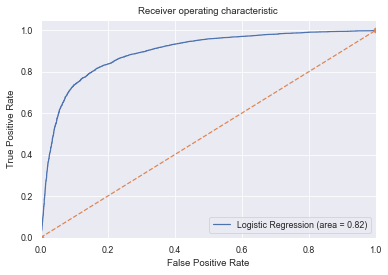

In [3360]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'o--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Logistic: f1=0.822 auc=0.883


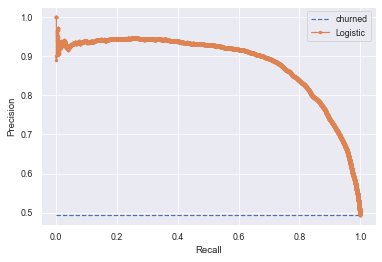

In [3361]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
# predict probabilities
logreg_probs = logreg.predict_proba(X_test)
# keep probabilities for the positive outcome only
logreg_probs = logreg_probs[:, 1]
# predict class values
y_pred = logreg.predict(X_test)
logreg_precision, logreg_recall, _ = precision_recall_curve(y_test, logreg_probs)
logreg_f1, logreg_auc = f1_score(y_test, y_pred), auc(logreg_recall, logreg_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (logreg_f1, logreg_auc))
# plot the precision-recall curves
churned = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [churned, churned], linestyle='--', label='churned')
plt.plot(logreg_recall, logreg_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

### Testing logistic regression model on september data

In [3362]:
date_cols = []
for col in sept_data.columns:
    if "date" in col:
        date_cols.append(col)
sept_data.drop(date_cols, axis=1, inplace=True)

In [3363]:
sept_data['user_tenure'] = le.fit_transform(sept_data['user_tenure'].astype('str'))

In [3364]:
sept_smote_blncd = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(sept_data.drop('is_churned', axis=1), sept_data['is_churned'],
test_size=0.3, random_state=0)

columns = X_train.columns

sept_smote_blncd_X, sept_smote_blncd_y = sept_smote_blncd.fit_sample(X_train, y_train)
sept_smote_blncd_X = pd.DataFrame(data=sept_smote_blncd_X, columns=columns )
sept_smote_blncd_y= pd.DataFrame(data=sept_smote_blncd_y,columns=['is_churned'])
print("Number of churned", len(sept_smote_blncd_y[sept_smote_blncd_y["is_churned"]==0])/len(sept_smote_blncd_y))
print("Number of non-churned", len(sept_smote_blncd_y[sept_smote_blncd_y["is_churned"]==1])/len(sept_smote_blncd_y))

Number of churned 0.5
Number of non-churned 0.5


In [3368]:
X_sept = sept_smote_blncd_X 
y_sept = sept_smote_blncd_y

In [3369]:
# sept_test = sept_data.drop("is_churned", axis=1)
sept_test = X_sept[sep_imp_feature]

In [3370]:
sept_test.shape

(38088, 19)

In [3371]:
sept_test = scaler.fit_transform(sept_test)

In [3372]:
sept_test.shape

(38088, 19)

In [3373]:
y_sept_pred = logreg.predict(sept_test)

In [3374]:
y_sept_pred.shape

(38088,)

In [3375]:
print(classification_report(y_sept, y_sept_pred))

              precision    recall  f1-score   support

           0       0.72      0.73      0.72     19044
           1       0.72      0.72      0.72     19044

    accuracy                           0.72     38088
   macro avg       0.72      0.72      0.72     38088
weighted avg       0.72      0.72      0.72     38088



<center><h3>Principal Component Analysis</h3></center>

---

In [3405]:
# Splitting the data into train and test
X=smote_blncd_X
y=smote_blncd_y['is_churned']
X_transformed = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, \
                                                    train_size=0.7,test_size=0.3,random_state=100)
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
pca.fit(X_train)

PCA(random_state=42)

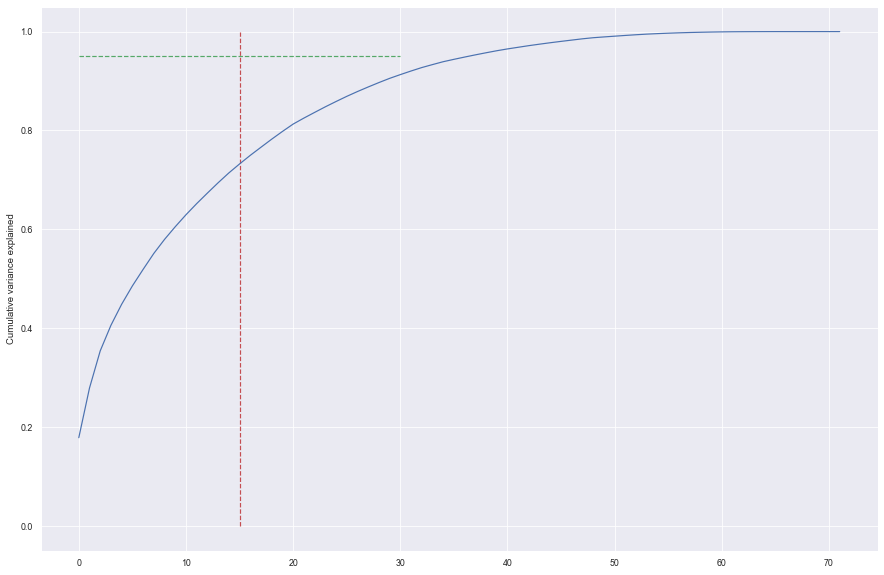

In [3406]:
#show explained variance using scree plot

var_cumu = np.cumsum(pca.explained_variance_ratio_)

fig = plt.figure(figsize=[15,10])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [3407]:
X_train_pca = pca.fit_transform(X_train)
print(X_train_pca.shape)

X_test_pca = pca.transform(X_test)
print(X_test_pca.shape)



(26661, 72)
(11427, 72)


In [3408]:
logit_pca = LogisticRegression(C=1e9)
logit_pca.fit(X_train_pca, y_train)

# probabilities output
y_pred = logit_pca.predict(X_test_pca)

# y_pred_sept = logit_pca.predict(X_sept_pca)

# y_pred_df = pd.DataFrame(y_pred)

C:\Users\monis\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [3409]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      5770
           1       0.87      0.89      0.88      5657

    accuracy                           0.88     11427
   macro avg       0.88      0.88      0.88     11427
weighted avg       0.88      0.88      0.88     11427



In [3410]:
print("Logistic Regression accuracy with PCA: ",accuracy_score(y_test,y_pred))

Logistic Regression accuracy with PCA:  0.8768705697033342


In [3439]:
col = list(X.columns)
df_pca = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],
                       'PC4':pca.components_[3],'PC5':pca.components_[4],'Feature':col})
df_pca.head(10)

PC1       PC2       PC3       PC4       PC5           Feature
0  0.080318  0.286045  0.100239 -0.134847  0.005561            arpu_8
1 -0.025849  0.174330  0.108704  0.005619 -0.283308       onnet_mou_8
2 -0.004463  0.223846  0.100439 -0.115993  0.023878      offnet_mou_8
3 -0.004783  0.103112  0.011830  0.009612  0.072760     roam_og_mou_8
4  0.011538  0.101824  0.030300 -0.087061 -0.088272  loc_og_t2t_mou_8
5  0.026907  0.153891  0.014627 -0.180324  0.042343  loc_og_t2m_mou_8
6  0.025872  0.091352 -0.049112 -0.144045  0.119318  loc_og_t2f_mou_8
7  0.004727  0.041147  0.072321 -0.035544 -0.157311  loc_og_t2c_mou_8
8 -0.035061  0.132490  0.108581  0.050973 -0.290010  std_og_t2t_mou_8
9 -0.024452  0.148590  0.107874 -0.026512 -0.027070  std_og_t2m_mou_8

In [ ]:
'arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9',
'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'std_og_t2t_mou_9','std_og_t2m_mou_9'

In [2836]:
sept_test.columns

Index(['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9',
       'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9',
       'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9',
       'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9',
       'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9',
       'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9',
       'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9',
       'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9',
       'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9',
       'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9',
       'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9',
       'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9',
       'sachet_3g_9', 'fb_user_9', 'sep_vbc_3g', 'mobile_number'],
   

<center><h3>Decision Tree</h3></center>

 ---

In [3423]:
from sklearn.tree import DecisionTreeClassifier

In [3424]:
X_train, X_test, y_train, y_test = train_test_split(X[imp_features], y, \
                                                    train_size=0.7,test_size=0.3,random_state=100)

In [3425]:
dt_default = DecisionTreeClassifier()
dt_default.fit(X_train, y_train)

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      5770
           1       0.88      0.90      0.89      5657

    accuracy                           0.89     11427
   macro avg       0.89      0.89      0.89     11427
weighted avg       0.89      0.89      0.89     11427

Accuracy: 0.8879845978822088


#### Hyper Parameter tuning using Grid Search CV
---

In [3429]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1, n_jobs=4, )

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    4.2s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    5.8s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=4,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             verbose=1)

In [3430]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8805745665743269
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [3431]:
dt_default = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=50,
                       min_samples_split=50)
dt_default.fit(X_train, y_train)

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      5770
           1       0.87      0.88      0.88      5657

    accuracy                           0.88     11427
   macro avg       0.88      0.88      0.88     11427
weighted avg       0.88      0.88      0.88     11427

Accuracy: 0.8766080336046206


In [3464]:
y_pred_sept = dt_default.predict(X_sept[sep_imp_feature])
# Printing classification report
print(classification_report(y_sept, y_pred_sept))
print("Accuracy:",metrics.accuracy_score(y_sept, y_pred_sept))

              precision    recall  f1-score   support

           0       1.00      0.34      0.51     19044
           1       0.60      1.00      0.75     19044

    accuracy                           0.67     38088
   macro avg       0.80      0.67      0.63     38088
weighted avg       0.80      0.67      0.63     38088

Accuracy: 0.6716813694601974


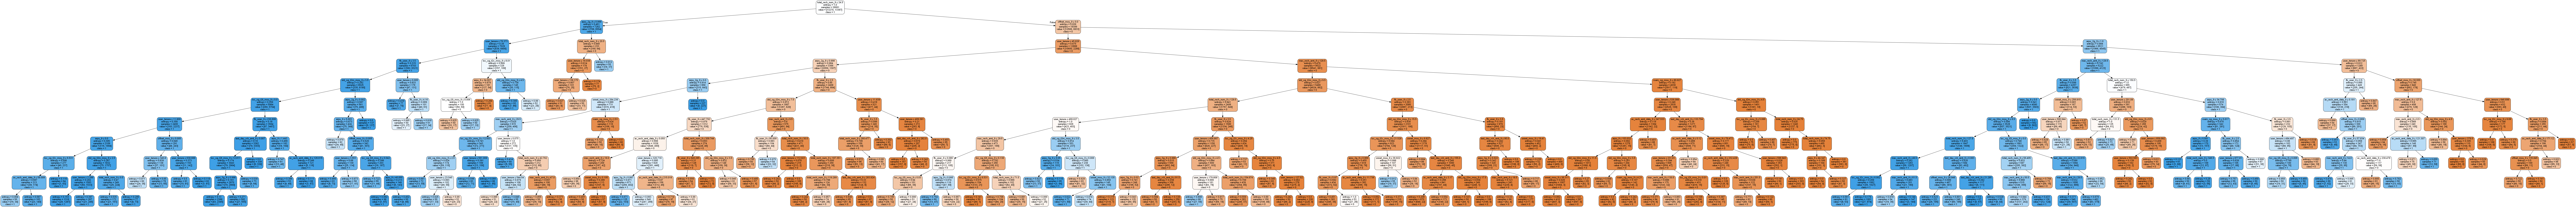

In [3436]:
dot_data = StringIO()
export_graphviz(dt_default, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X_sept[sep_imp_feature].columns,class_names=["0","1"])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [2513]:
confusion_matrix(y_test, y_pred_default)

array([[5121,  649],
       [ 712, 4945]], dtype=int64)

### Project End Summary

**Model summary:**
 > 
 
 * Logistic regression gives 72% f1 score compare to decision tree's 68%
    


In [ ]:
PCA based important features

In [3440]:
df_pca.head(10)

PC1       PC2       PC3       PC4       PC5           Feature
0  0.080318  0.286045  0.100239 -0.134847  0.005561            arpu_8
1 -0.025849  0.174330  0.108704  0.005619 -0.283308       onnet_mou_8
2 -0.004463  0.223846  0.100439 -0.115993  0.023878      offnet_mou_8
3 -0.004783  0.103112  0.011830  0.009612  0.072760     roam_og_mou_8
4  0.011538  0.101824  0.030300 -0.087061 -0.088272  loc_og_t2t_mou_8
5  0.026907  0.153891  0.014627 -0.180324  0.042343  loc_og_t2m_mou_8
6  0.025872  0.091352 -0.049112 -0.144045  0.119318  loc_og_t2f_mou_8
7  0.004727  0.041147  0.072321 -0.035544 -0.157311  loc_og_t2c_mou_8
8 -0.035061  0.132490  0.108581  0.050973 -0.290010  std_og_t2t_mou_8
9 -0.024452  0.148590  0.107874 -0.026512 -0.027070  std_og_t2m_mou_8

In [ ]:
The below variables are important on the basis of their P-values and VIF analysis

In [3447]:
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             is_churned   No. Observations:                26661
Model:                            GLM   Df Residuals:                    26641
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10629.
Date:                Mon, 31 Aug 2020   Deviance:                       21258.
Time:                        22:48:53   Pearson chi2:                 1.80e+07
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        1.7074      0.055     30.877      0.000       1.599       1.816
onnet_mou_8                 -0.0008   6.49e-05    -11.918      0.000      -0.001      -0.001
offnet_mou_8                -0.0056      0.000    -29.555      0.000      -0.006      -0.005
roam_og_mou_8                0.0062      0.000     29.106      0.000       0.006       0.007
std_og_t2m_mou_8             0.0047      0.000     23.325      0.000       0.004       0.005
total_rech_num_8            -0.1690      0.005    -33.257      0.000      -0.179      -0.159
max_rech_amt_8               0.0005      0.000      2.744      0.006       0.000       0.001
last_day_rch_amt_8          -0.0037      0.000    -16.358      0.000      -0.004      -0.003
av_rech_amt_data_8          -0.0022      0.000     -7.270      0.000      -0.003      -0.002
arpu_2g_8                    0.0016      0.000      4.575      0.000       0.001       0.002
fb_user_8                   -1.1214      0.063    -17.715      0.000      -1.245      -0.997
user_tenure                 -0.3681      0.013    -28.150      0.000      -0.394      -0.342
avg_arpu_6_7                 0.0010   7.97e-05     13.084      0.000       0.001       0.001
avg_loc_og_t2t_mou_6_7      -0.0005      0.000     -3.935      0.000      -0.001      -0.000
avg_loc_og_t2c_mou_6_7      -0.0269      0.004     -6.049      0.000      -0.036      -0.018
avg_total_rech_num_6_7       0.0721      0.004     17.801      0.000       0.064       0.080
avg_av_rech_amt_data_6_7    -0.0012      0.000     -4.448      0.000      -0.002      -0.001
avg_arpu_3g_6_7              0.0015      0.000      5.378      0.000       0.001       0.002
avg_fb_user_6_7              0.1699      0.069      2.449      0.014       0.034       0.306
avg_jul_aug                 -0.0005   7.34e-05     -6.157      0.000      -0.001      -0.000
============================================================================================
"""

In [3446]:
df_features

feature_name  weights
0            avg_fb_user_6_7   0.1699
1     avg_total_rech_num_6_7   0.0721
2              roam_og_mou_8   0.0062
3           std_og_t2m_mou_8   0.0047
4                  arpu_2g_8   0.0016
5            avg_arpu_3g_6_7   0.0015
6               avg_arpu_6_7   0.0010
7             max_rech_amt_8   0.0005
8     avg_loc_og_t2t_mou_6_7  -0.0005
9                avg_jul_aug  -0.0005
10               onnet_mou_8  -0.0008
11  avg_av_rech_amt_data_6_7  -0.0012
12        av_rech_amt_data_8  -0.0022
13        last_day_rch_amt_8  -0.0037
14              offnet_mou_8  -0.0056
15    avg_loc_og_t2c_mou_6_7  -0.0269
16          total_rech_num_8  -0.1690
17               user_tenure  -0.3681
18                 fb_user_8  -1.1214

In [3438]:
imp_features

['onnet_mou_8',
 'offnet_mou_8',
 'roam_og_mou_8',
 'std_og_t2m_mou_8',
 'total_rech_num_8',
 'max_rech_amt_8',
 'last_day_rch_amt_8',
 'av_rech_amt_data_8',
 'arpu_2g_8',
 'fb_user_8',
 'user_tenure',
 'avg_arpu_6_7',
 'avg_loc_og_t2t_mou_6_7',
 'avg_loc_og_t2c_mou_6_7',
 'avg_total_rech_num_6_7',
 'avg_av_rech_amt_data_6_7',
 'avg_arpu_3g_6_7',
 'avg_fb_user_6_7',
 'avg_jul_aug']

Recommendations
1. Company should roll out discount schemes on the data plans on 3g services
2. STD outgoing calls should be made cheaper which can retain the customer
3. Company should offer discount on a certain number of rechareges
4. Company should target there data rates strategy around Facebook usage
5. Company should make roaming cheaper.